# Análise dos Preços dos Combustíveis no Brasil: 2022-2024

## Introdução

### Contexto do Projeto

A variação nos preços dos combustíveis impacta diretamente a economia e o cotidiano dos brasileiros. Compreender essas oscilações é essencial para consumidores, empresários e gestores públicos. A Agência Nacional do Petróleo, Gás Natural e Biocombustíveis (ANP) publica relatórios semanais sobre os preços dos combustíveis em todo o país. Este estudo analisa dados históricos a partir de 2022, incluindo preços médios, mínimos e máximos dos diferentes tipos de combustíveis, segmentados por região e estado. A análise detalha as variações recentes e identifica tendências, levando em conta as diferenças regionais.

### Importância da Análise

Compreender os preços dos combustíveis é fundamental para traçar o cenário econômico e tomar decisões assertivas. Identificar tendências e padrões regionais e ao longo do tempo ajuda tanto na estratégia de negócios quanto na formulação de políticas públicas. Isso contribui para a estabilidade econômica e para a defesa dos interesses dos consumidores.

### Objetivos do Projeto

1. **Analisar a Variação dos Preços:** Examinar as oscilações dos preços dos combustíveis ao longo do tempo e como elas diferem entre regiões e estados.

2. **Comparar Preços Regionais:** Destacar os combustíveis com preços mais altos e mais baixos em cada região.

3. **Avaliar a Volatilidade:** Investigar a variação dos preços com base em análises estatísticas, como o desvio padrão e o coeficiente de variação.

4. **Explorar Relações:** Verificar se há uma relação entre a quantidade de postos de combustíveis avaliados e os preços praticados.

5. **Antecipar Tendências de Mercado:** Usar modelos de séries temporais e machine learning para estimar os preços dos combustíveis no último quadrimestre de 2024.

### Descrição Geral dos Dados

Os dados utilizados para esta análise foram fornecidos pela ANP e abrangem a série histórica do levantamento semanal de preços desde **janeiro de 2022** até **setembro de 2024**. Os dados incluem informações sobre:

- **DATA INICIAL:** Data de início da pesquisa.
- **DATA FINAL:** Data de término da pesquisa.
- **REGIÃO:** Região geográfica de coleta dos dados.
- **ESTADO:** Estado brasileiro onde os dados foram coletados.
- **MUNICÍPIO:** Município específico da coleta.
- **PRODUTO:** Tipo de combustível (_etanol, gasolina comum, GLP, GNV, óleo diesel, óleo diesel S10, gasolina aditivada_).
- **NÚMERO DE POSTOS PESQUISADOS:** Quantidade de postos de combustíveis incluídos na pesquisa.
- **UNIDADE DE MEDIDA:** Unidade em que o preço é medido.
- **PREÇO MÉDIO REVENDA:** Preço médio de revenda do combustível.
- **DESVIO PADRÃO REVENDA:** Desvio padrão dos preços de revenda.
- **PREÇO MÍNIMO REVENDA:** Preço mínimo de revenda.
- **PREÇO MÁXIMO REVENDA:** Preço máximo de revenda.
- **MARGEM MÉDIA REVENDA:** Margem média de revenda.
- **COEF DE VARIAÇÃO REVENDA:** Coeficiente de variação dos preços de revenda.

## Exploração dos Dados

### Limpeza e Preparação dos Dados

**Importação das Bibliotecas**

In [1]:
# Bibliotecas usadas
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import logging           as log
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Importação dos Dados**

In [2]:
# Importação da base de dados
df_combustivel = pd.read_csv("https://raw.githubusercontent.com/SimoesLeticia/Bootcamp-Data-Analytics-WoMakersCode-Projeto-Final/refs/heads/main/preco-combustivel-2022-2024.csv")

# Visualizando os dados
df_combustivel.head()

DATA INICIAL DATA FINAL        REGIÃO             ESTADO  \
0     1/2/2022   1/8/2022       SUDESTE          SAO PAULO   
1     1/2/2022   1/8/2022  CENTRO OESTE              GOIAS   
2     1/2/2022   1/8/2022           SUL  RIO GRANDE DO SUL   
3     1/2/2022   1/8/2022         NORTE               PARA   
4     1/2/2022   1/8/2022       SUDESTE       MINAS GERAIS   

               MUNICÍPIO           PRODUTO  NÚMERO DE POSTOS PESQUISADOS  \
0             ADAMANTINA  ETANOL HIDRATADO                             7   
1  AGUAS LINDAS DE GOIAS  ETANOL HIDRATADO                             4   
2               ALEGRETE  ETANOL HIDRATADO                             2   
3               ALENQUER  ETANOL HIDRATADO                             1   
4                ALFENAS  ETANOL HIDRATADO                             2   

  UNIDADE DE MEDIDA PREÇO MÉDIO REVENDA DESVIO PADRÃO REVENDA  \
0              R$/l               4,656                 0,078   
1              R$/l               5,199                 0,001   
2              R$/l               6,845                 0,643   
3              R$/l               7,120                 0,000   
4              R$/l               5,499                 0,000   

  PREÇO MÍNIMO REVENDA PREÇO MÁXIMO REVENDA MARGEM MÉDIA REVENDA  \
0                4,580                4,790                    -   
1                5,198                5,199                    -   
2                6,390                7,299                    -   
3                7,120                7,120                    -   
4                5,499                5,499                    -   

  COEF DE VARIAÇÃO REVENDA  
0                    0,017  
1                    0,000  
2                    0,094  
3                    0,000  
4                    0,000

**Visualização Inicial**

In [3]:
# Quantidade de linhas e colunas
print(df_combustivel.shape)

(330928, 14)


In [4]:
# Valores faltantes
print(df_combustivel.isnull().sum())

DATA INICIAL                    0
DATA FINAL                      0
REGIÃO                          0
ESTADO                          0
MUNICÍPIO                       0
PRODUTO                         0
NÚMERO DE POSTOS PESQUISADOS    0
UNIDADE DE MEDIDA               0
PREÇO MÉDIO REVENDA             0
DESVIO PADRÃO REVENDA           0
PREÇO MÍNIMO REVENDA            0
PREÇO MÁXIMO REVENDA            0
MARGEM MÉDIA REVENDA            0
COEF DE VARIAÇÃO REVENDA        0
dtype: int64


In [5]:
# Tipos de variáveis
print(df_combustivel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330928 entries, 0 to 330927
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   DATA INICIAL                  330928 non-null  object
 1   DATA FINAL                    330928 non-null  object
 2   REGIÃO                        330928 non-null  object
 3   ESTADO                        330928 non-null  object
 4   MUNICÍPIO                     330928 non-null  object
 5   PRODUTO                       330928 non-null  object
 6   NÚMERO DE POSTOS PESQUISADOS  330928 non-null  int64 
 7   UNIDADE DE MEDIDA             330928 non-null  object
 8   PREÇO MÉDIO REVENDA           330928 non-null  object
 9   DESVIO PADRÃO REVENDA         330928 non-null  object
 10  PREÇO MÍNIMO REVENDA          330928 non-null  object
 11  PREÇO MÁXIMO REVENDA          330928 non-null  object
 12  MARGEM MÉDIA REVENDA          330928 non-null  object
 13 

**Conversão de Datas**

As colunas `DATA INICIAL` e `DATA FINAL` estão no formato `object`, então vamos convertê-los para datetime.

In [6]:
# Converter colunas para o tipo DateTime
df_combustivel["DATA INICIAL"] = pd.to_datetime(
    df_combustivel["DATA INICIAL"], errors="coerce", format="%m/%d/%Y"
)
df_combustivel["DATA FINAL"] = pd.to_datetime(
    df_combustivel["DATA FINAL"], errors="coerce", format="%m/%d/%Y"
)

**Conversão de Valores Numéricos**

Os valores numéricos estão no formato `object` com vírgulas como separadores decimais. Precisamos remover as vírgulas e converter os valores para o tipo `float`.

In [7]:
# Função para converter valores de string com vírgula para float
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.replace(".", "").replace(",", ".")
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value


# Aplicar a conversão em todas as colunas numéricas
cols_numericas = [
    "PREÇO MÉDIO REVENDA",
    "DESVIO PADRÃO REVENDA",
    "PREÇO MÍNIMO REVENDA",
    "PREÇO MÁXIMO REVENDA",
    "MARGEM MÉDIA REVENDA",
    "COEF DE VARIAÇÃO REVENDA",
]

for col in cols_numericas:
    df_combustivel[col] = df_combustivel[col].apply(convert_to_numeric)

**Tratamento de Valores Nulos**

Após a conversão dos dados, é comum se deparar com valores nulos. Existem estratégias para lidar com isso:

1. **Exclusão:** Podemos remover as linhas ou colunas com dados ausentes.

2. **Substituição:** Uma alternativa é preencher os valores nulos com um número fixo, como zero, por exemplo.

No meu projeto, escolhi substituir os valores nulos por zero, já que apenas na coluna `MARGEM MÉDIA REVENDA` havia dados faltantes após a conversão.

In [8]:
df_combustivel = df_combustivel.fillna(0)

**Exclusão de Campos Desnecessários para Análise**

Como as análises serão focadas nas variações de preços por região e estado, decidi eliminar a coluna `MUNICÍPIO`. Além disso, a coluna `MARGEM MÉDIA REVENDA` também não será utilizada e foi removida do dataset.

In [9]:
df_combustivel = df_combustivel.drop(
    columns=["MUNICÍPIO", "MARGEM MÉDIA REVENDA"]
)

**Verificação Pós-Tratamento das colunas**

In [10]:
# Verificar o tipo das variáveis após as conversões
print(df_combustivel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330928 entries, 0 to 330927
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   DATA INICIAL                  330928 non-null  datetime64[ns]
 1   DATA FINAL                    330928 non-null  datetime64[ns]
 2   REGIÃO                        330928 non-null  object        
 3   ESTADO                        330928 non-null  object        
 4   PRODUTO                       330928 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS  330928 non-null  int64         
 6   UNIDADE DE MEDIDA             330928 non-null  object        
 7   PREÇO MÉDIO REVENDA           330928 non-null  float64       
 8   DESVIO PADRÃO REVENDA         330928 non-null  float64       
 9   PREÇO MÍNIMO REVENDA          330928 non-null  float64       
 10  PREÇO MÁXIMO REVENDA          330928 non-null  float64       
 11  COEF DE VARIA

**Verificação Final**

In [11]:
# Visualizar novamente o do dataframe para confirmar a limpeza
df_combustivel.head()

DATA INICIAL DATA FINAL        REGIÃO             ESTADO           PRODUTO  \
0   2022-01-02 2022-01-08       SUDESTE          SAO PAULO  ETANOL HIDRATADO   
1   2022-01-02 2022-01-08  CENTRO OESTE              GOIAS  ETANOL HIDRATADO   
2   2022-01-02 2022-01-08           SUL  RIO GRANDE DO SUL  ETANOL HIDRATADO   
3   2022-01-02 2022-01-08         NORTE               PARA  ETANOL HIDRATADO   
4   2022-01-02 2022-01-08       SUDESTE       MINAS GERAIS  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                             7              R$/l                4.656   
1                             4              R$/l                5.199   
2                             2              R$/l                6.845   
3                             1              R$/l                7.120   
4                             2              R$/l                5.499   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.078                 4.580                 4.790   
1                  0.001                 5.198                 5.199   
2                  0.643                 6.390                 7.299   
3                  0.000                 7.120                 7.120   
4                  0.000                 5.499                 5.499   

   COEF DE VARIAÇÃO REVENDA  
0                     0.017  
1                     0.000  
2                     0.094  
3                     0.000  
4                     0.000

### Análise Exploratória dos Dados

#### Estatísticas Descritivas

In [12]:
# Estatísticas descritivas para variáveis numéricas
df_combustivel.describe()

DATA INICIAL                     DATA FINAL  \
count                         330928                         330928   
mean   2023-05-02 02:26:43.751873792  2023-05-08 02:26:43.751873792   
min              2022-01-02 00:00:00            2022-01-08 00:00:00   
25%              2022-08-07 00:00:00            2022-08-13 00:00:00   
50%              2023-05-28 00:00:00            2023-06-03 00:00:00   
75%              2023-12-24 00:00:00            2023-12-30 00:00:00   
max              2024-07-28 00:00:00            2024-08-03 00:00:00   
std                              NaN                            NaN   

       NÚMERO DE POSTOS PESQUISADOS  PREÇO MÉDIO REVENDA  \
count                 330928.000000        330928.000000   
mean                       8.741469            21.646686   
min                        1.000000             2.750000   
25%                        5.000000             5.300000   
50%                        7.000000             5.930000   
75%                       10.000000             6.910000   
max                      210.000000           154.250000   
std                        9.564359            37.156441   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
count          330928.000000         330928.000000         330928.000000   
mean                0.928461             20.389888             23.063462   
min                 0.000000              2.390000              2.790000   
25%                 0.081000              5.050000              5.530000   
50%                 0.163000              5.730000              6.190000   
75%                 0.298000              6.690000              7.190000   
max                32.146000            154.000000            160.000000   
std                 2.190488             34.811132             39.873207   

       COEF DE VARIAÇÃO REVENDA  
count             330928.000000  
mean                   0.032178  
min                    0.000000  
25%                    0.014000  
50%                    0.027000  
75%                    0.045000  
max                    0.491000  
std                    0.026188

In [13]:
# Estatísticas descritivas para variáveis categóricas
df_combustivel.select_dtypes(include="object").describe()

REGIÃO     ESTADO         PRODUTO UNIDADE DE MEDIDA
count    330928     330928          330928            330928
unique        5         27               7                 3
top     SUDESTE  SAO PAULO  GASOLINA COMUM              R$/l
freq     155538      82075           53894            262941

In [14]:
# Categorias únicas para variáveis categóricas
for col in df_combustivel.select_dtypes(include="object").columns:
    print(f"{col}: {df_combustivel[col].unique()}\n")

REGIÃO: ['SUDESTE' 'CENTRO OESTE' 'SUL' 'NORTE' 'NORDESTE']

ESTADO: ['SAO PAULO' 'GOIAS' 'RIO GRANDE DO SUL' 'PARA' 'MINAS GERAIS'
 'MATO GROSSO' 'RIO DE JANEIRO' 'PARANA' 'SERGIPE' 'ESPIRITO SANTO'
 'TOCANTINS' 'ALAGOAS' 'SANTA CATARINA' 'PERNAMBUCO' 'BAHIA' 'PARAIBA'
 'RORAIMA' 'DISTRITO FEDERAL' 'RONDONIA' 'MATO GROSSO DO SUL' 'CEARA'
 'ACRE' 'MARANHAO' 'AMAZONAS' 'RIO GRANDE DO NORTE' 'PIAUI' 'AMAPA']

PRODUTO: ['ETANOL HIDRATADO' 'GASOLINA ADITIVADA' 'GASOLINA COMUM' 'GLP' 'GNV'
 'OLEO DIESEL' 'OLEO DIESEL S10']

UNIDADE DE MEDIDA: ['R$/l' 'R$/13kg' 'R$/m³']



#### Análise da Distribuição dos Preços de Combustíveis

##### `[código-fonte]`

In [15]:
# Definir o tema e a paleta
sns.set_theme(style="whitegrid", palette="Blues_r")

In [16]:
def plot_distribuicao_precos(produto, df):
    """
    Gera uma figura com três histogramas na parte superior e três boxplots na parte inferior,
    mostrando a distribuição dos preços de revenda (médio, mínimo e máximo) para um determinado combustível.

    Parâmetros:
    produto (str): O nome do combustível para filtrar os dados.
    df (pd.DataFrame): O DataFrame contendo os dados dos preços de combustíveis.
    """

    # Filtrar o DataFrame pelo produto
    df_produto = df[df["PRODUTO"] == produto]

    # Criar a figura com 2 linhas e 3 colunas
    fig, axes = plt.subplots(
        2, 3, figsize=(18, 10), gridspec_kw={"height_ratios": [2, 1]}
    )

    # Colunas a serem plotadas
    colunas = [
        "PREÇO MÉDIO REVENDA",
        "PREÇO MÍNIMO REVENDA",
        "PREÇO MÁXIMO REVENDA",
    ]

    # Loop para gerar os histogramas na primeira linha
    for i, coluna in enumerate(colunas):
        sns.histplot(df_produto[coluna], kde=True, bins=10, ax=axes[0, i])
        axes[0, i].set_title(f"Distribuição do {colunas[i]}")
        axes[0, i].set_xlabel("")
        axes[0, i].set_ylabel("Frequência")

    # Loop para gerar os boxplots na segunda linha
    for i, coluna in enumerate(colunas):
        sns.boxplot(data=df_produto, x=coluna, ax=axes[1, i], fill=False)
        axes[1, i].set_xlabel("")

    # Ajustar o layout
    plt.suptitle(f"Distribuição dos Preços de Revenda - {produto}", fontsize=16)
    plt.tight_layout()
    sns.despine(top=True, right=True)

    # Mostrar o gráfico
    plt.show()

##### **Combustível: ETANOL HIDRATADO**

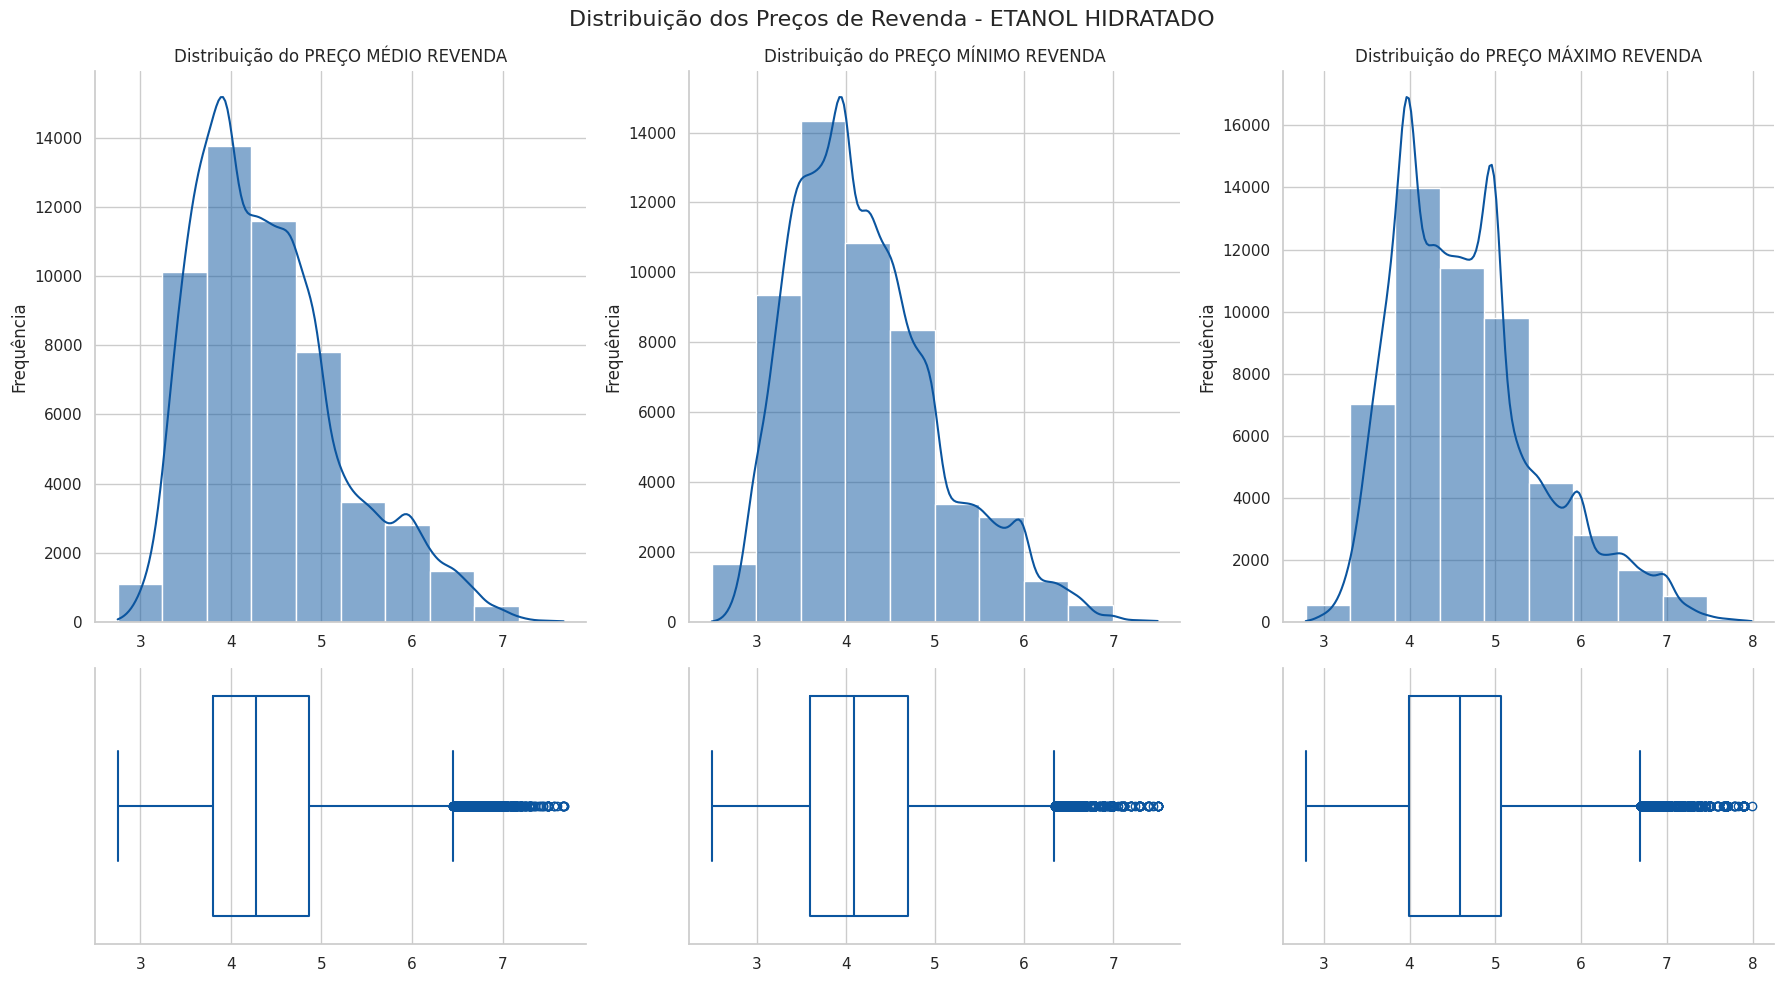

In [17]:
# ETANOL HIDRATADO
plot_distribuicao_precos("ETANOL HIDRATADO", df_combustivel)

**Análise dos Dados de Etanol Hidratado**

Os preços de revenda do etanol hidratado no Brasil, entre 2022 e 2024, mostram uma distribuição assimétrica positiva, com a maioria dos preços variando entre R\\$ 3,80 e R\\$ 4,85. A média dos preços é de R\\$ 4,42, com preços mínimos em torno de R\\$ 2.49 e máximos de R\\$ 7,98, indicando baixa variação no mercado durante o período analisado. O coeficiente de variação de 3,7% reflete baixa volatilidade, típica de mercados regulados. Embora o mercado seja estável, fatores regionais como impostos e custos logísticos ainda afetam as diferenças de preço.


##### **Combustível: GASOLINA ADITIVADA**

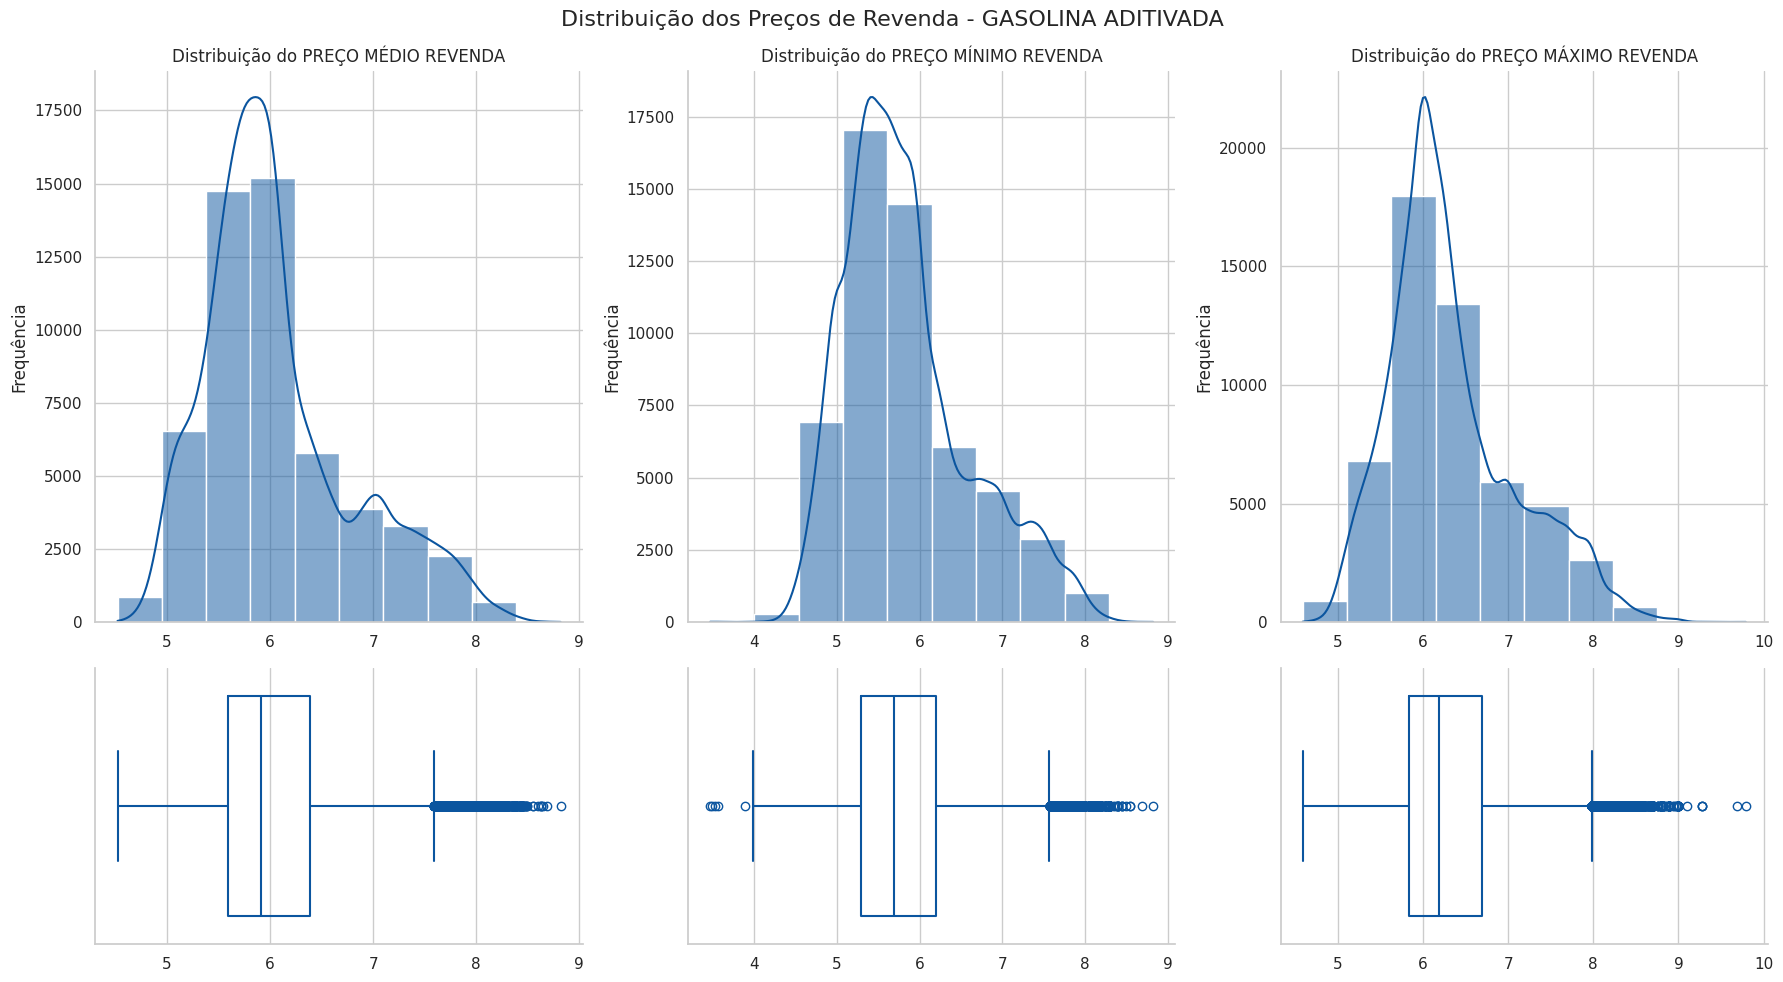

In [18]:
# GASOLINA ADITIVADA
plot_distribuicao_precos("GASOLINA ADITIVADA", df_combustivel)


**Análise dos Dados de Gasolina Aditivada**

Os preços de revenda da gasolina aditivada no Brasil, entre 2022 e 2024, mostram uma leve dispersão, com a maioria dos valores situados entre R\\$ 5,59 e R\\$ 6,39. A distribuição é assimétrica à direita, com alguns postos praticando preços acima da média. O preço médio de revenda é de R\\$ 6,06, enquanto o preço máximo chega a R\\$ 9,79. Apesar da concentração de preços em uma faixa específica, algumas exceções puxam o valor médio para cima. O coeficiente de variação médio de 2,95% indica uma oscilação de preços pouco expressiva, evidenciando um padrão consistente.

##### **Combustível: GASOLINA COMUM**

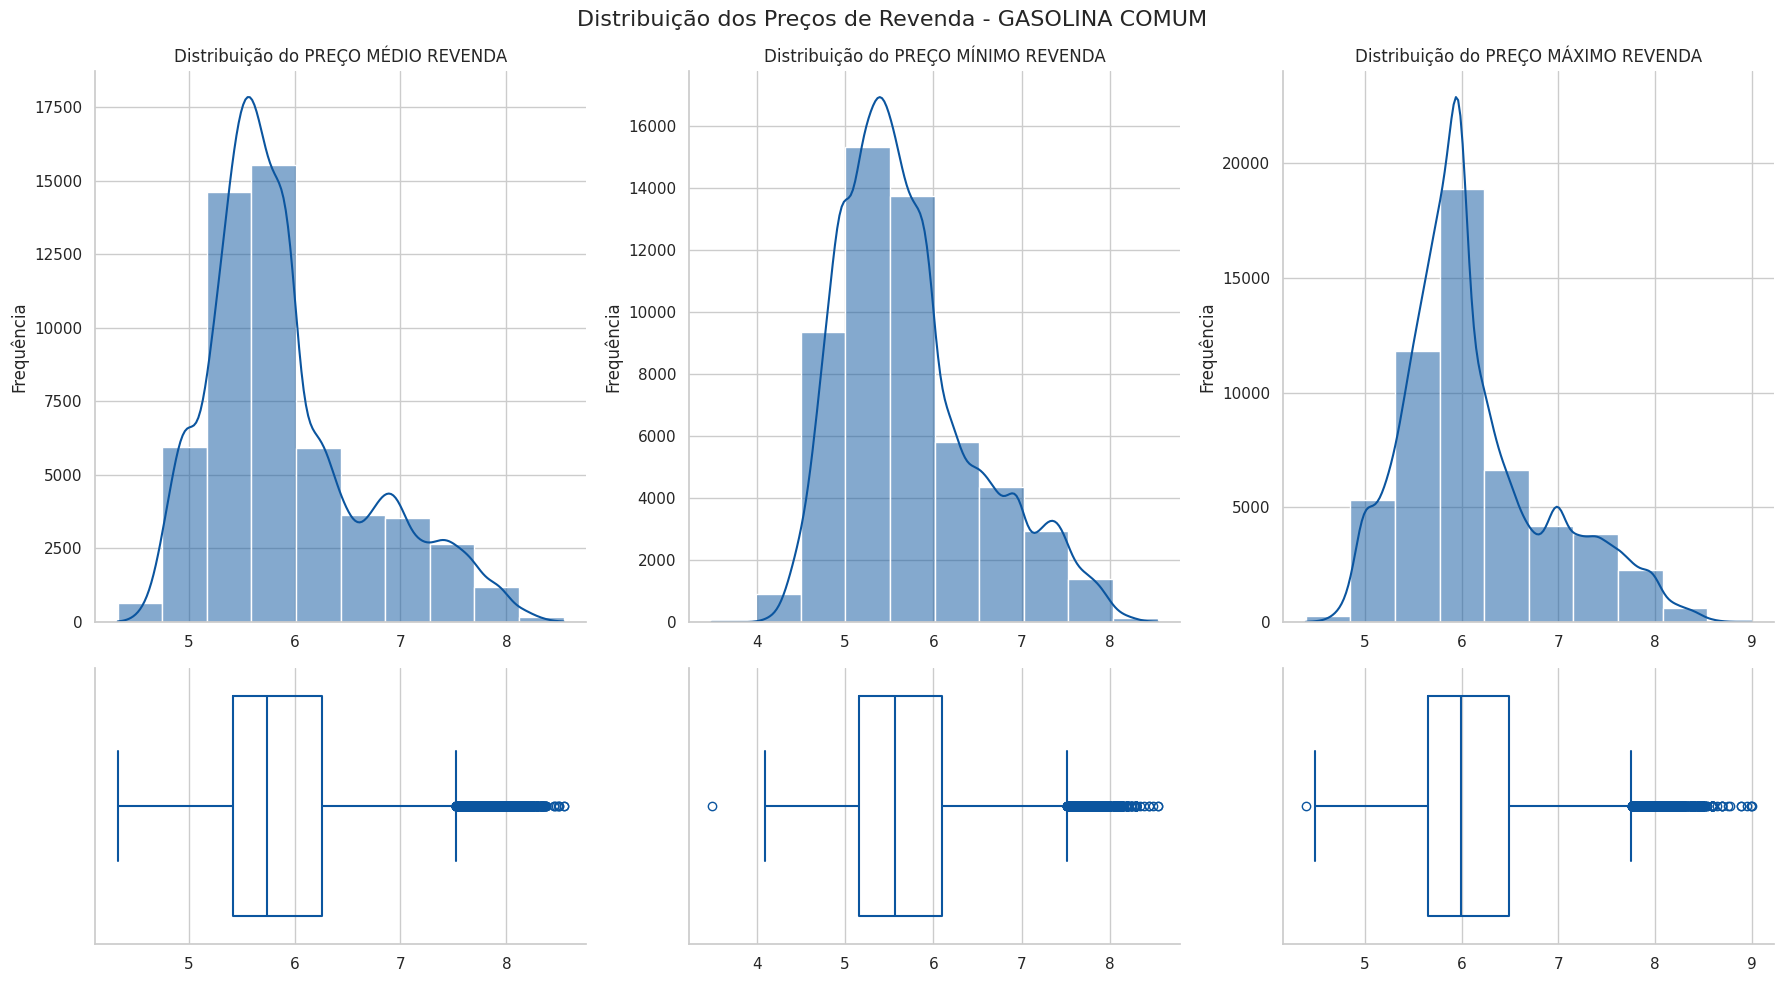

In [19]:
# GASOLINA COMUM
plot_distribuicao_precos("GASOLINA COMUM", df_combustivel)

**Análise dos Dados de Gasolina Comum**

A análise dos preços de revenda da gasolina comum de 2022 a 2024 revela uma distribuição assimétrica positiva. A maioria dos preços está entre R\\$ 5,42 e R\\$ 6,26, com a média em R\\$ 5,91. No entanto, há postos com preços significativamente mais altos, com um máximo registrado de R\\$ 8,99, indicando discrepâncias pontuais. O coeficiente de variação médio de 2,36% sugere estabilidade, mas os valores extremos, que variam de R\\$ 3,49 a R\\$ 8,99, indicam que fatores regionais podem causar variações significativas nos preços.

##### **Combustível: GLP**

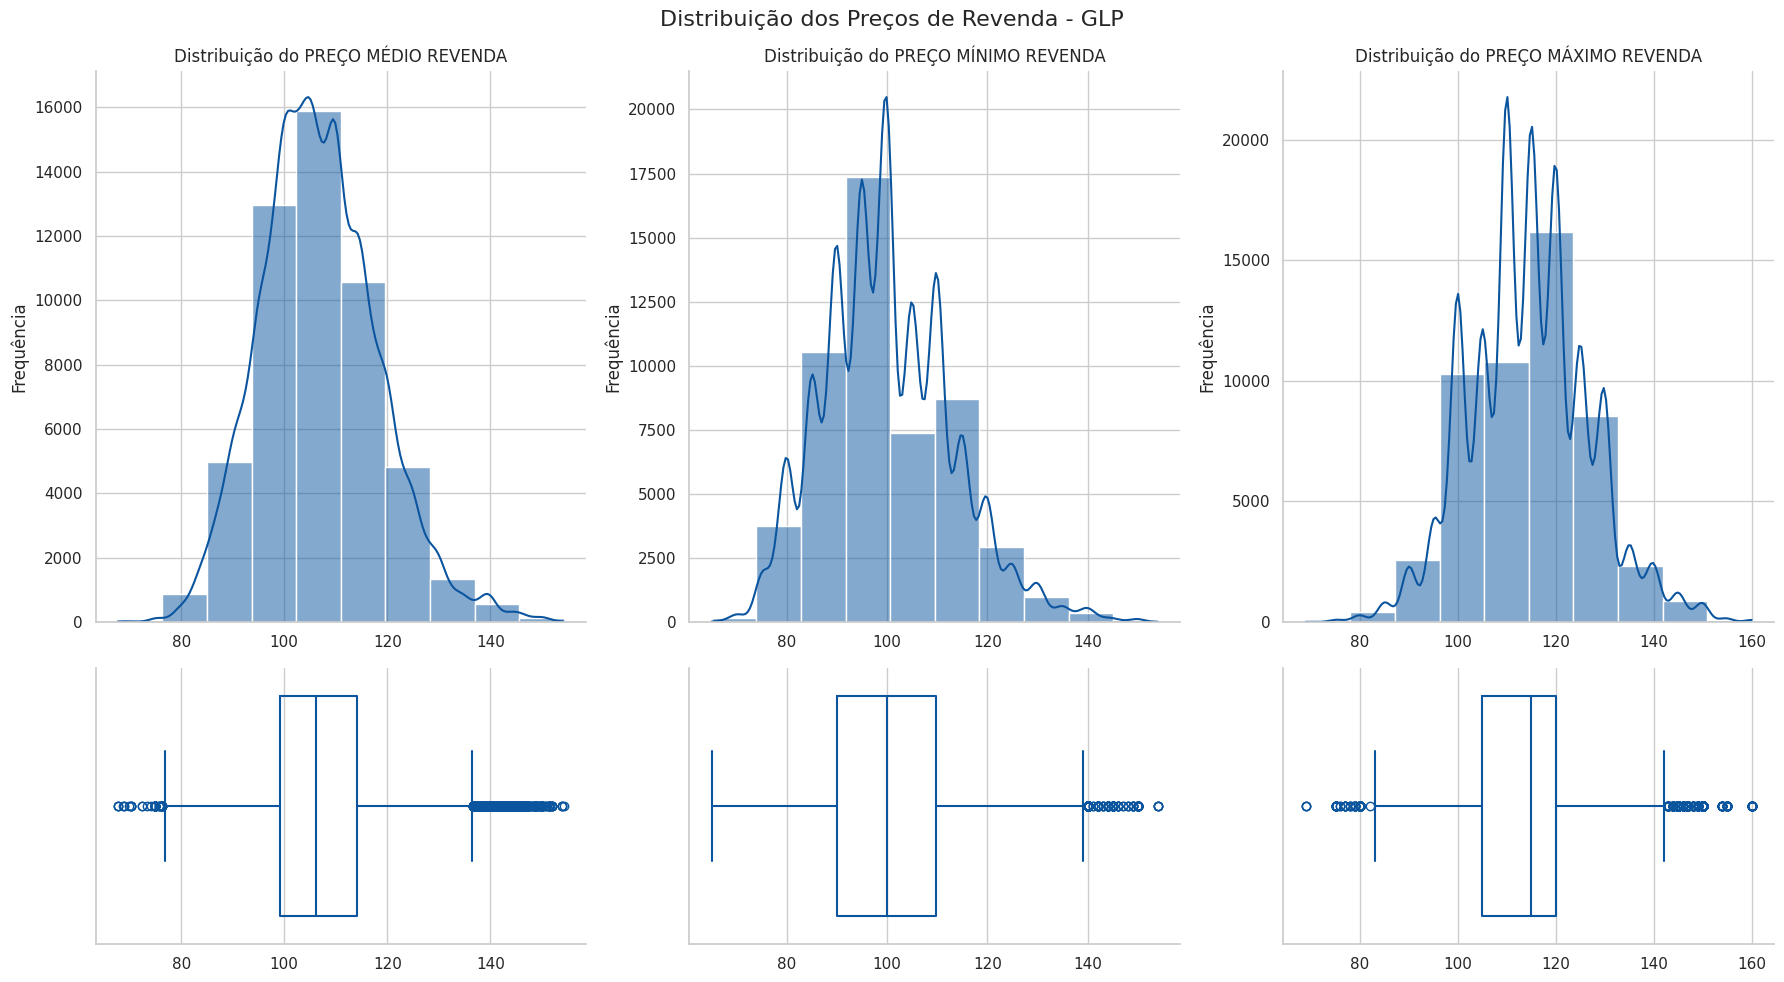

In [20]:
# GLP
plot_distribuicao_precos("GLP", df_combustivel)

**Análise dos Dados de GLP (Gás Liquefeito de Petróleo)**

Os dados de revenda do GLP mostram uma leve assimetria, com a maioria dos preços próximos à média de mercado. Contudo, há flutuações acentuadas nos extremos da distribuição. O preço médio de revenda é de R\\$ 106,85, com um desvio padrão de R\\$ 11,40 e um coeficiente de variação médio de 4,78%. Isso sugere estabilidade geral, embora as flutuações na amplitude dos preços máximos e mínimos sejam consideráveis.

##### **Combustível: GNV**

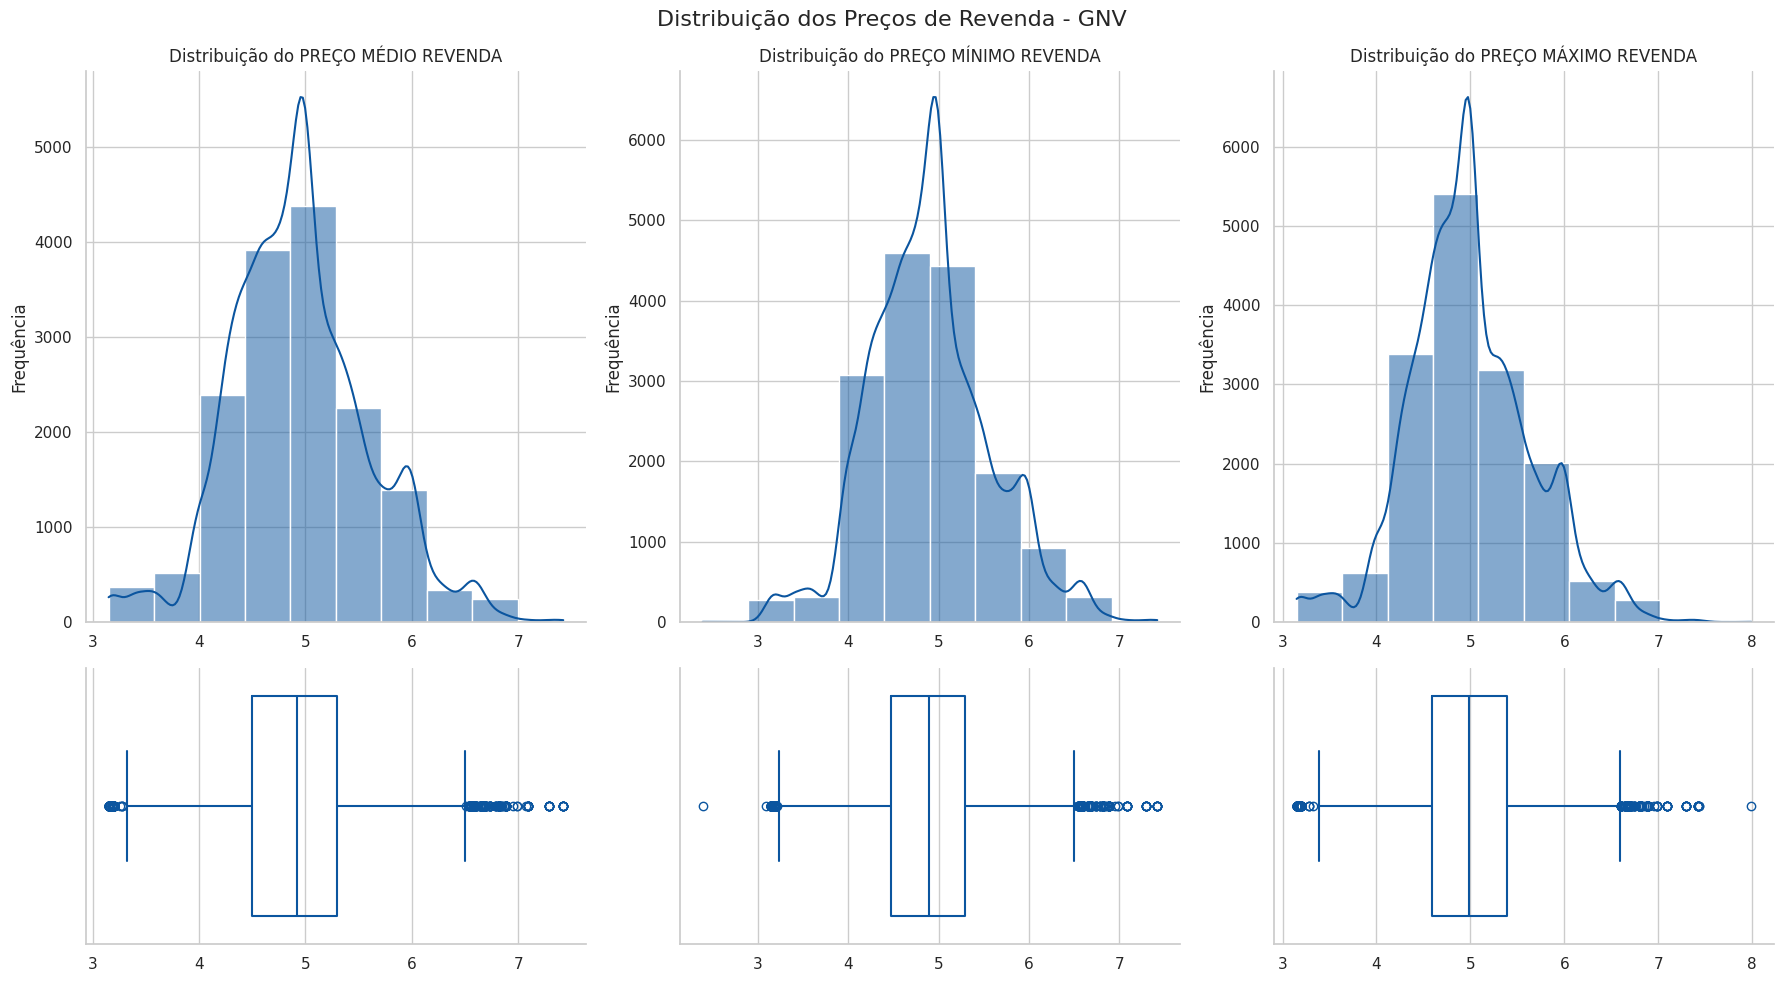

In [21]:
# GNV
plot_distribuicao_precos("GNV", df_combustivel)

**Análise dos Dados de GNV (Gás Natural Veicular)**

A análise dos preços de revenda do GNV entre 2022 e 2024 revela uma média de R\\$ 4,94, com um desvio padrão de R\\$ 0,64 e um coeficiente de variação de 0,83%, indicando uma distribuição significativamente estável. A maioria dos preços está entre R\\$ 4,50 e R\\$ 5,30. No entanto, variações nos preços mínimos e máximos sugerem que existem elementos externos que influenciam a variação dos preços, principalmente quando nos aproximamos dos valores mais altos da escala.

##### **Combustível: OLEO DIESEL**

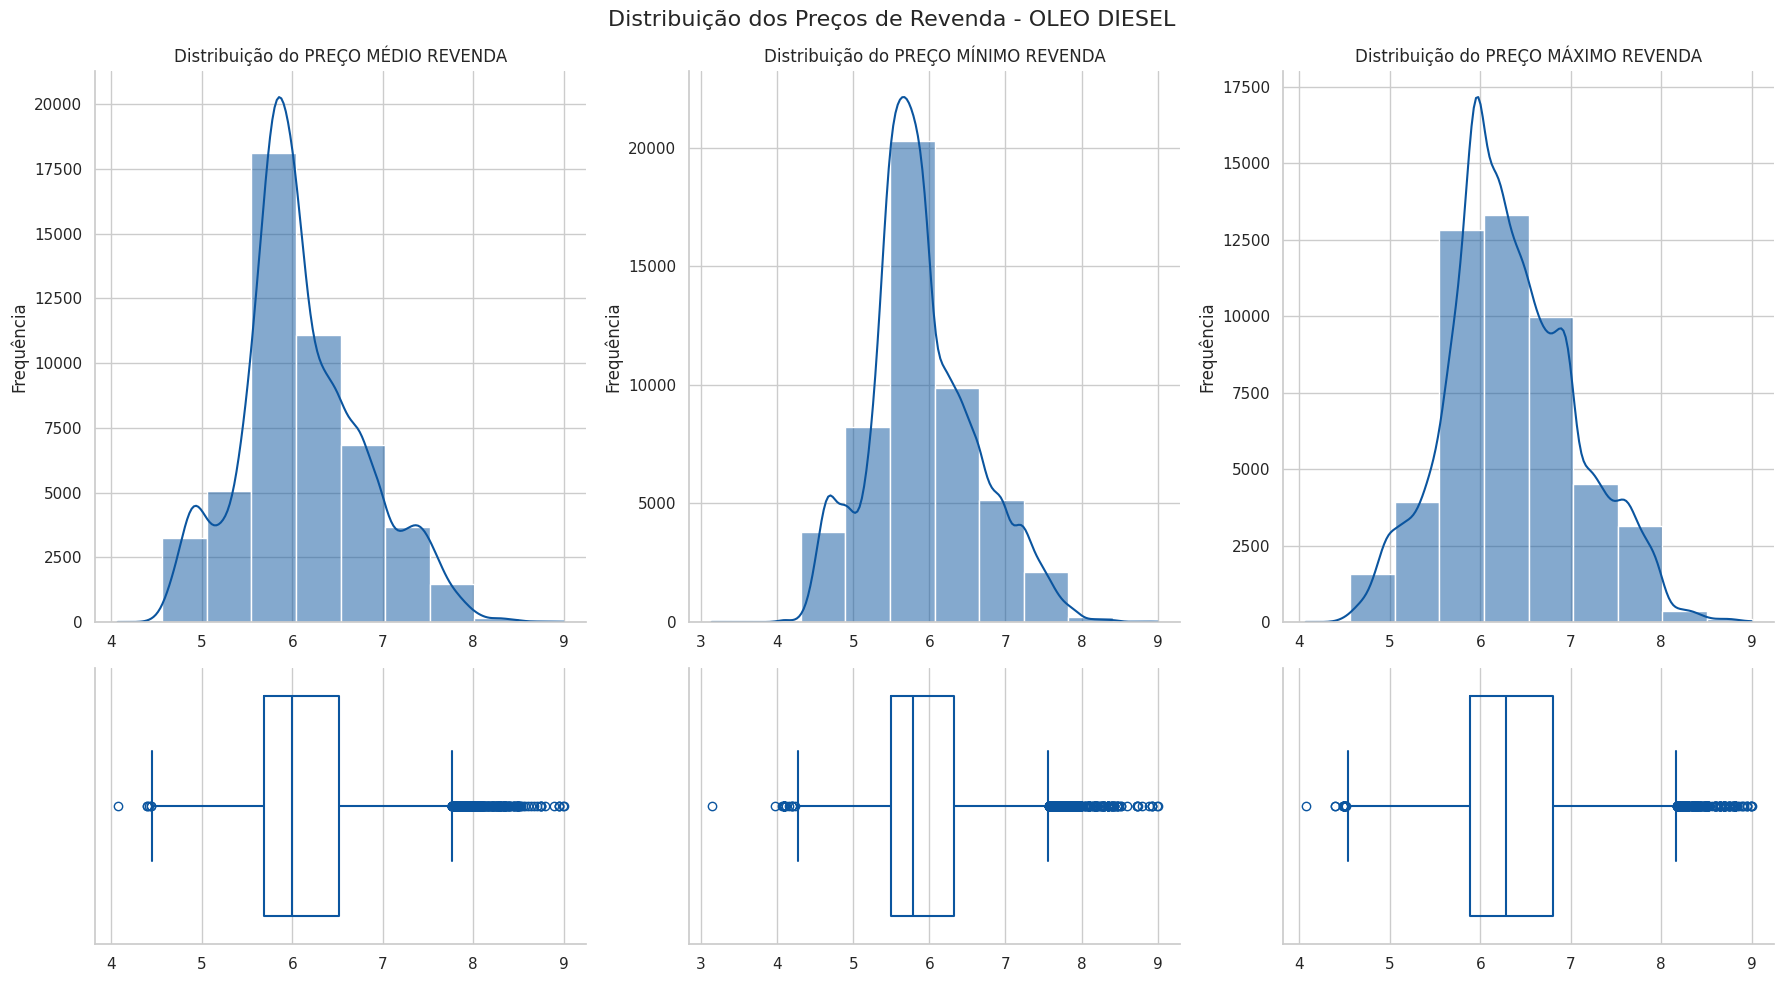

In [22]:
# OLEO DIESEL
plot_distribuicao_precos("OLEO DIESEL", df_combustivel)

**Análise dos Dados de OLEO DIESEL**

Os preços de revenda do óleo diesel entre 2022 e 2024 têm uma média de R\\$ 6,11, com um desvio padrão de R\\$ 0,68 e um coeficiente de variação de aproximadamente 2,9%. A maioria dos preços está entre R\\$ 5,69 e R\\$ 6,52. A amplitude total dos preços varia de R\\$ 3,14 a R\\$ 9,00, refletindo variações regionais ou econômicas que influenciam os preços praticados.

##### **Combustível: OLEO DIESEL S10**

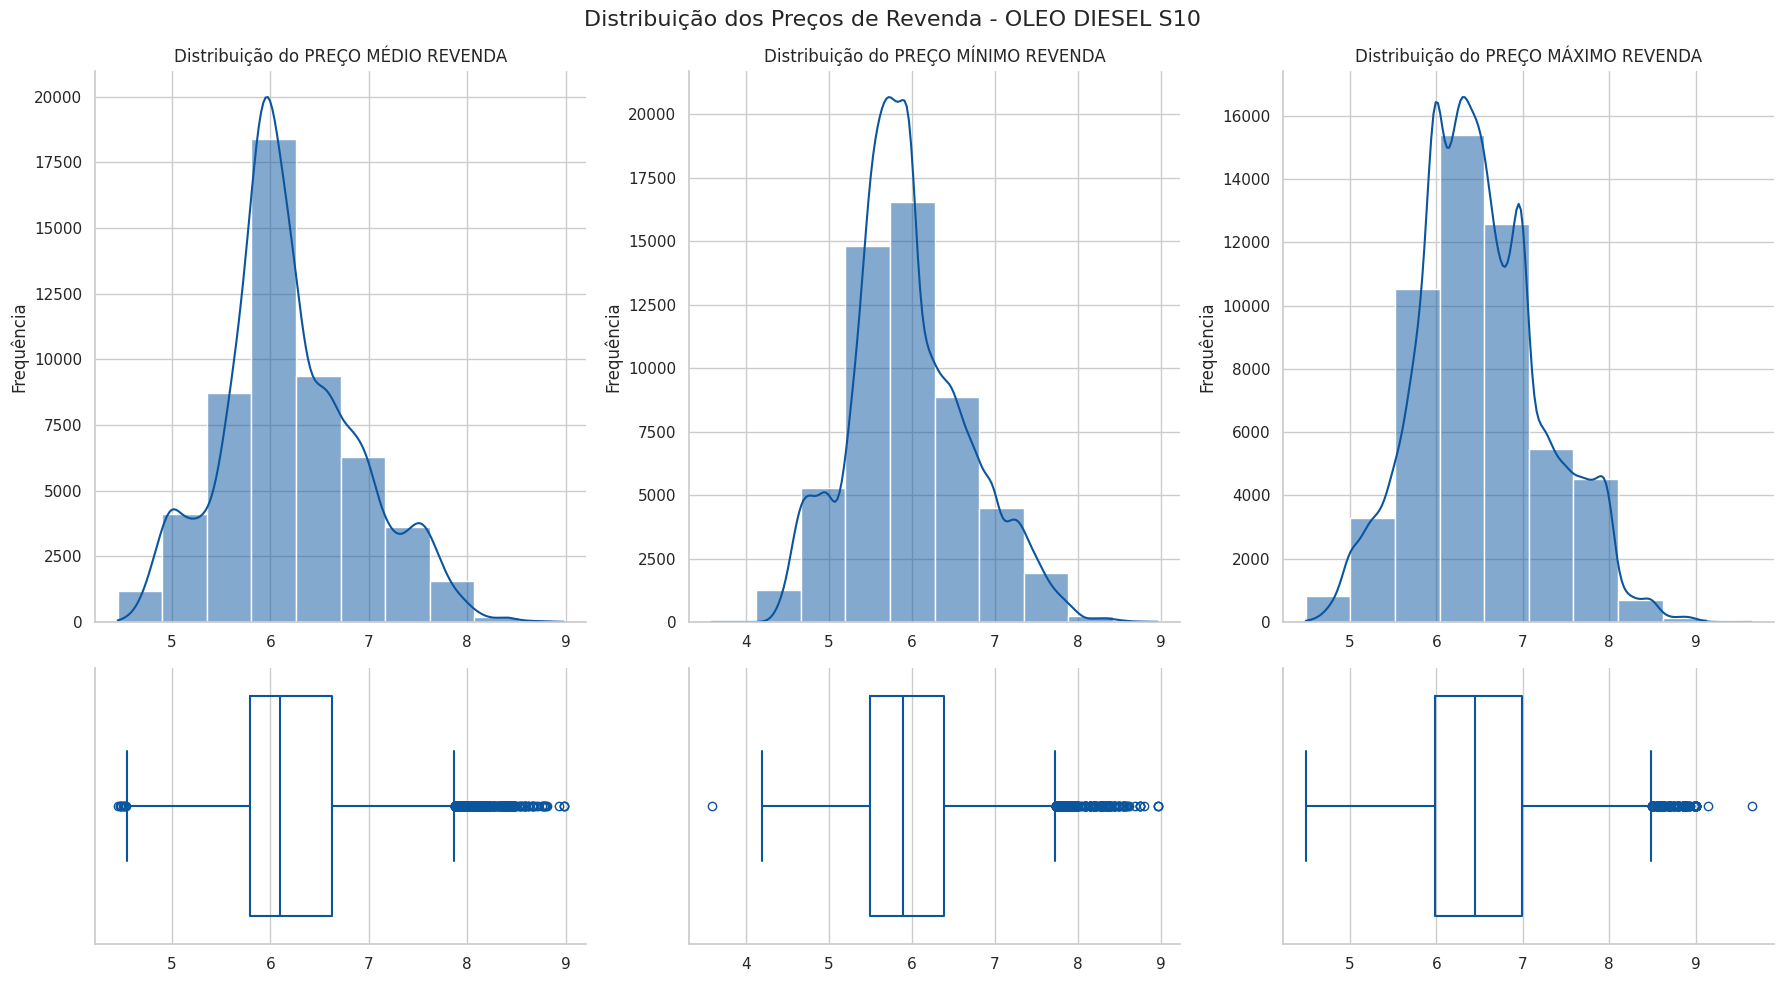

In [23]:
# OLEO DIESEL S10
plot_distribuicao_precos("OLEO DIESEL S10", df_combustivel)

**Análise dos Dados de OLEO DIESEL S10**

A análise dos preços de revenda do óleo diesel S10, de 2022 a 2024, revela uma média estável de R\\$ 6,20, com um coeficiente de variação de 3,23%. A maioria dos preços está entre R\\$ 5,79 e R\\$ 6,62. Contudo, a amplitude dos preços varia de R\\$ 3,59 a R\\$ 9,65, indicando grandes discrepâncias regionais ou condições de mercado que causam variações significativas.

In [24]:
df_combustivel.head()

DATA INICIAL DATA FINAL        REGIÃO             ESTADO           PRODUTO  \
0   2022-01-02 2022-01-08       SUDESTE          SAO PAULO  ETANOL HIDRATADO   
1   2022-01-02 2022-01-08  CENTRO OESTE              GOIAS  ETANOL HIDRATADO   
2   2022-01-02 2022-01-08           SUL  RIO GRANDE DO SUL  ETANOL HIDRATADO   
3   2022-01-02 2022-01-08         NORTE               PARA  ETANOL HIDRATADO   
4   2022-01-02 2022-01-08       SUDESTE       MINAS GERAIS  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                             7              R$/l                4.656   
1                             4              R$/l                5.199   
2                             2              R$/l                6.845   
3                             1              R$/l                7.120   
4                             2              R$/l                5.499   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.078                 4.580                 4.790   
1                  0.001                 5.198                 5.199   
2                  0.643                 6.390                 7.299   
3                  0.000                 7.120                 7.120   
4                  0.000                 5.499                 5.499   

   COEF DE VARIAÇÃO REVENDA  
0                     0.017  
1                     0.000  
2                     0.094  
3                     0.000  
4                     0.000

## Análise Temporal dos Preços e Variações dos Combustíveis

### `[código-fonte]`

In [25]:
def calcular_variacao_mensal_por_produto(produto, df):
    # Filtra pelo produto
    df_produto = df[df["PRODUTO"] == produto].copy()

    # Ajusta a coluna de data para o formato Ano-Mês
    df_produto["DATA FINAL"] = pd.to_datetime(df_produto["DATA FINAL"])
    df_produto["ANO_MES"] = (
        df_produto["DATA FINAL"].dt.to_period("M").astype(str)
    )

    # Agrupa por Produto, Ano-Mês e Região, calculando o preço médio
    df_agrupado = (
        df_produto.groupby(["PRODUTO", "ANO_MES", "REGIÃO"])[
            "PREÇO MÉDIO REVENDA"
        ]
        .mean()
        .reset_index()
    )

    # Ordena para garantir que as variações serão calculadas na sequência certa
    df_agrupado = df_agrupado.sort_values(by=["REGIÃO", "ANO_MES"])

    # Calcula a variação percentual mês a mês dentro de cada região
    df_agrupado["VARIAÇÃO %"] = (
        df_agrupado.groupby("REGIÃO")["PREÇO MÉDIO REVENDA"].pct_change() * 100
    )
    df_agrupado["VARIAÇÃO %"] = df_agrupado["VARIAÇÃO %"].fillna(0)

    return df_agrupado


In [26]:
def calcular_volatilidade(df):
    # Calcula estatísticas descritivas do preço médio de revenda agrupado por região
    df_estatisticas = (
        df.groupby("REGIÃO")
        .agg(
            VOLATILIDADE=("PREÇO MÉDIO REVENDA", "std"),
            MENOR_PREÇO=("PREÇO MÉDIO REVENDA", "min"),
            MAIOR_PREÇO=("PREÇO MÉDIO REVENDA", "max"),
            MEDIA_PREÇO=("PREÇO MÉDIO REVENDA", "mean"),
            MEDIANA_PREÇO=("PREÇO MÉDIO REVENDA", "median"),
        )
        .reset_index()
    )

    # Cálculo do coeficiente de variação (CV %)
    df_estatisticas["CV_PERCENTUAL"] = (
        df_estatisticas["VOLATILIDADE"] / df_estatisticas["MEDIA_PREÇO"]
    ) * 100

    # Ordena o resultado por volatilidade, do maior para o menor
    df_estatisticas = df_estatisticas.sort_values(
        by="VOLATILIDADE", ascending=False
    ).reset_index(drop=True)

    return df_estatisticas


In [27]:
def plot_variacao_precos_combustivel_regiao(produto, df):
    """
    Gera uma figura com dois gráficos lado a lado:
    1) Evolução mensal do preço médio de revenda por região
    2) Evolução mensal da variação percentual do preço por região

    Parâmetros:
    produto (str): Nome do combustível para o título do gráfico.
    df (pd.DataFrame): O DataFrame contendo os dados dos preços de combustíveis.
    """
    # Definir paleta de cores personalizada
    paleta_regioes = {
        "NORTE": "#27AE60",
        "NORDESTE": "#FFC300",
        "CENTRO OESTE": "#E67E22",
        "SUDESTE": "#2980B9",
        "SUL": "#8E44AD",
    }

    # Criar a figura com 1 linha e 2 colunas
    fig, axes = plt.subplots(1, 2, figsize=(21, 6))

    # Primeiro Gráfico: Preço Médio
    for regiao in df["REGIÃO"].unique():
        df_regiao = df[df["REGIÃO"] == regiao]
        axes[0].plot(
            df_regiao["ANO_MES"],
            df_regiao["PREÇO MÉDIO REVENDA"],
            label=regiao,
            color=paleta_regioes.get(regiao.upper(), "#000000"),
            marker="o",
        )

    axes[0].set_title("Variação do Preço de Revenda por Região")
    axes[0].set_xlabel("Mês/Ano")
    axes[0].set_ylabel("Preço Médio (R$)")
    axes[0].tick_params(axis="x", rotation=45)
    axes[0].grid(True)
    axes[0].legend(title="Região")

    # Segundo Gráfico: Variação Percentual
    for regiao in df["REGIÃO"].unique():
        df_regiao = df[df["REGIÃO"] == regiao]
        axes[1].plot(
            df_regiao["ANO_MES"],
            df_regiao["VARIAÇÃO %"],
            label=regiao,
            color=paleta_regioes.get(regiao.upper(), "#000000"),
            marker="o",
        )

    axes[1].axhline(0, color="gray", linestyle="--", linewidth=1)  # Linha zero
    axes[1].set_title("Variação Percentual do Preço por Região")
    axes[1].set_xlabel("Mês/Ano")
    axes[1].set_ylabel("Variação Percentual (%)")
    axes[1].tick_params(axis="x", rotation=45)
    axes[1].grid(True)
    axes[1].legend(title="Região")

    # Ajustes finais
    plt.suptitle(
        f"Análise Temporal dos Preços e Variações - {produto}", fontsize=16
    )

    plt.tight_layout()
    sns.despine(top=True, right=True)

    plt.show()

### Combustível: ETANOL HIDRATADO

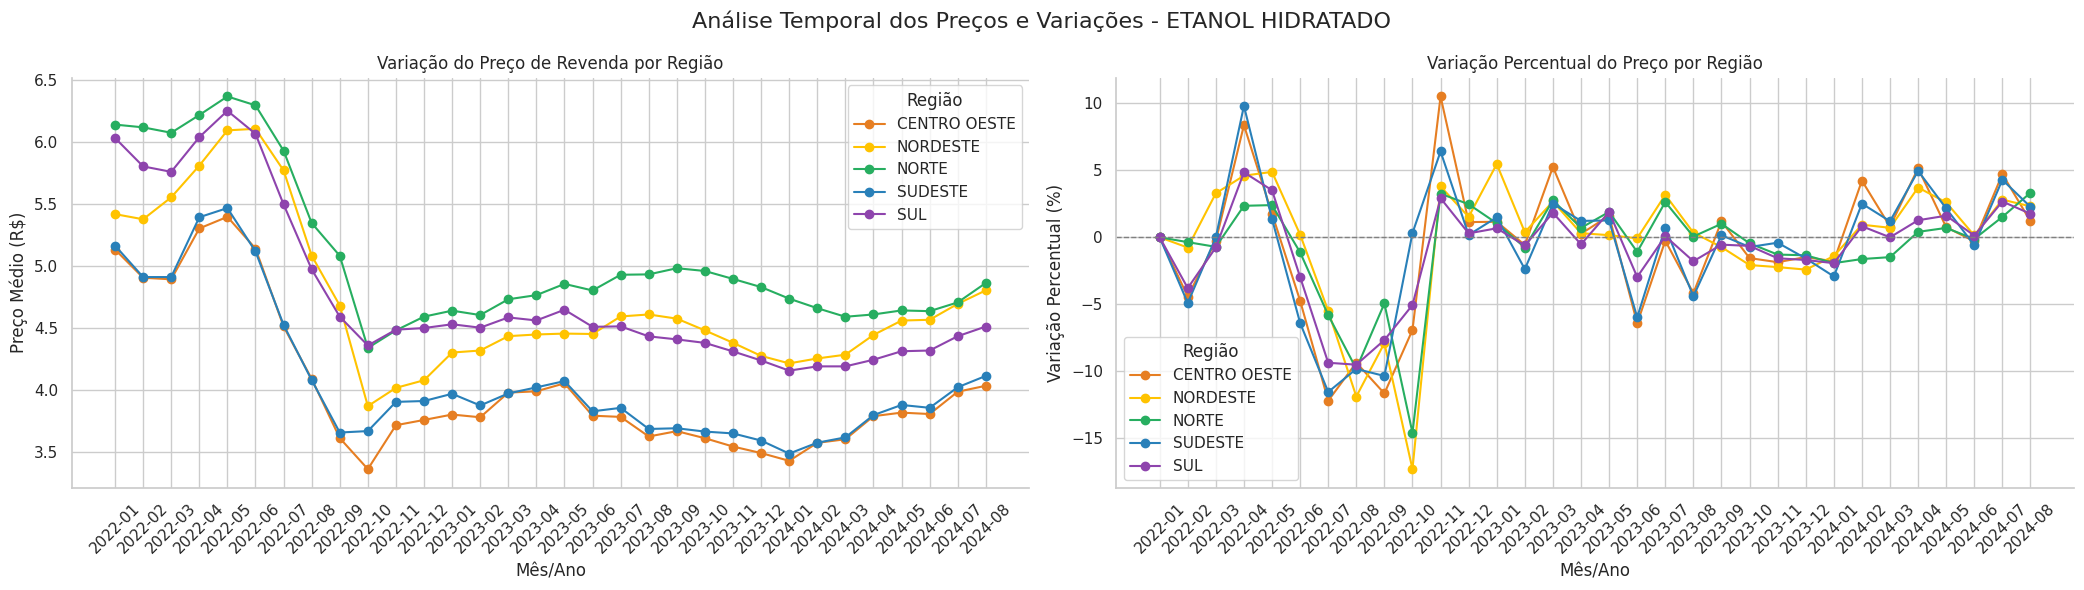

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0           SUL      0.652292     4.155532     6.249279     4.759359   
1         NORTE      0.617062     4.338537     6.364856     5.072277   
2      NORDESTE      0.603946     3.869595     6.104182     4.717865   
3  CENTRO OESTE      0.584804     3.362000     5.394968     4.030107   
4       SUDESTE      0.566458     3.487010     5.465622     4.091211   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       4.505068      13.705450  
1       4.841602      12.165377  
2       4.519376      12.801246  
3       3.797073      14.510877  
4       3.891368      13.845737

In [28]:
# ETANOL HIDRATADO
df_variacao = calcular_variacao_mensal_por_produto(
    "ETANOL HIDRATADO", df_combustivel
)

plot_variacao_precos_combustivel_regiao(
    "ETANOL HIDRATADO",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços do Etanol Hidratado (2022-2024)

Entre 2022 e 2024, a volatilidade dos preços do **etanol hidratado** no Brasil apresentou comportamentos distintos nas diferentes regiões do país. Ao longo desse período, o menor preço médio registrado foi de R\\$ 3,36 na região Centro-Oeste, enquanto o maior preço chegou a R\\$ 6,36 no Norte. Aliás, o Norte também apresentou a média geral mais alta, com R\\$ 5,07, contrastando com a menor média nacional, de R\\$ 4,03, observada novamente no Centro-Oeste.

No que se refere à volatilidade, o Sul se destacou como a região mais instável, apresentando o maior desvio padrão, de 0,65. Já o Sudeste mostrou ser a mais estável, com um índice de volatilidade de 0,57.

Analisando os gráficos de evolução dos preços e da variação percentual, essas diferenças regionais ficam ainda mais evidentes. De maneira geral, o que se viu foi uma tendência de queda nos preços médios no início do período analisado, seguida por oscilações moderadas na maioria do país. A variação percentual dos preços confirma que essas oscilações ocorreram em momentos específicos, com aumentos e quedas de preços que, embora tenham ocorrido em sincronia entre as regiões, apresentaram intensidades diferentes.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Durante o período analisado, houve uma tendência geral de queda nos preços do etanol hidratado, principalmente a partir do segundo trimestre de 2022, seguida por uma relativa estabilização a partir de 2023. Apesar de oscilações pontuais, os preços terminaram abaixo dos valores iniciais.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  A região Sul apresentou a maior volatilidade, com um desvio padrão de 0,65, indicando oscilações mais acentuadas. Em contraste, o Sudeste foi a região mais estável, com uma volatilidade de 0,57.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  O Norte registrou os preços mais altos, com média de R\\$ 5,07 e preço máximo de R\\$ 6,36. Já o Centro-Oeste teve os preços mais baixos, com uma média de R\\$ 4,03 e mínimo de R\\$ 3,36.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim, no segundo semestre de 2022 ocorreram quedas superiores a 10% em várias regiões. Já no início de 2023, houve uma recuperação com aumentos perceptíveis nos preços, ainda que com variações de intensidade entre as regiões.

### Combustível: GASOLINA ADITIVADA

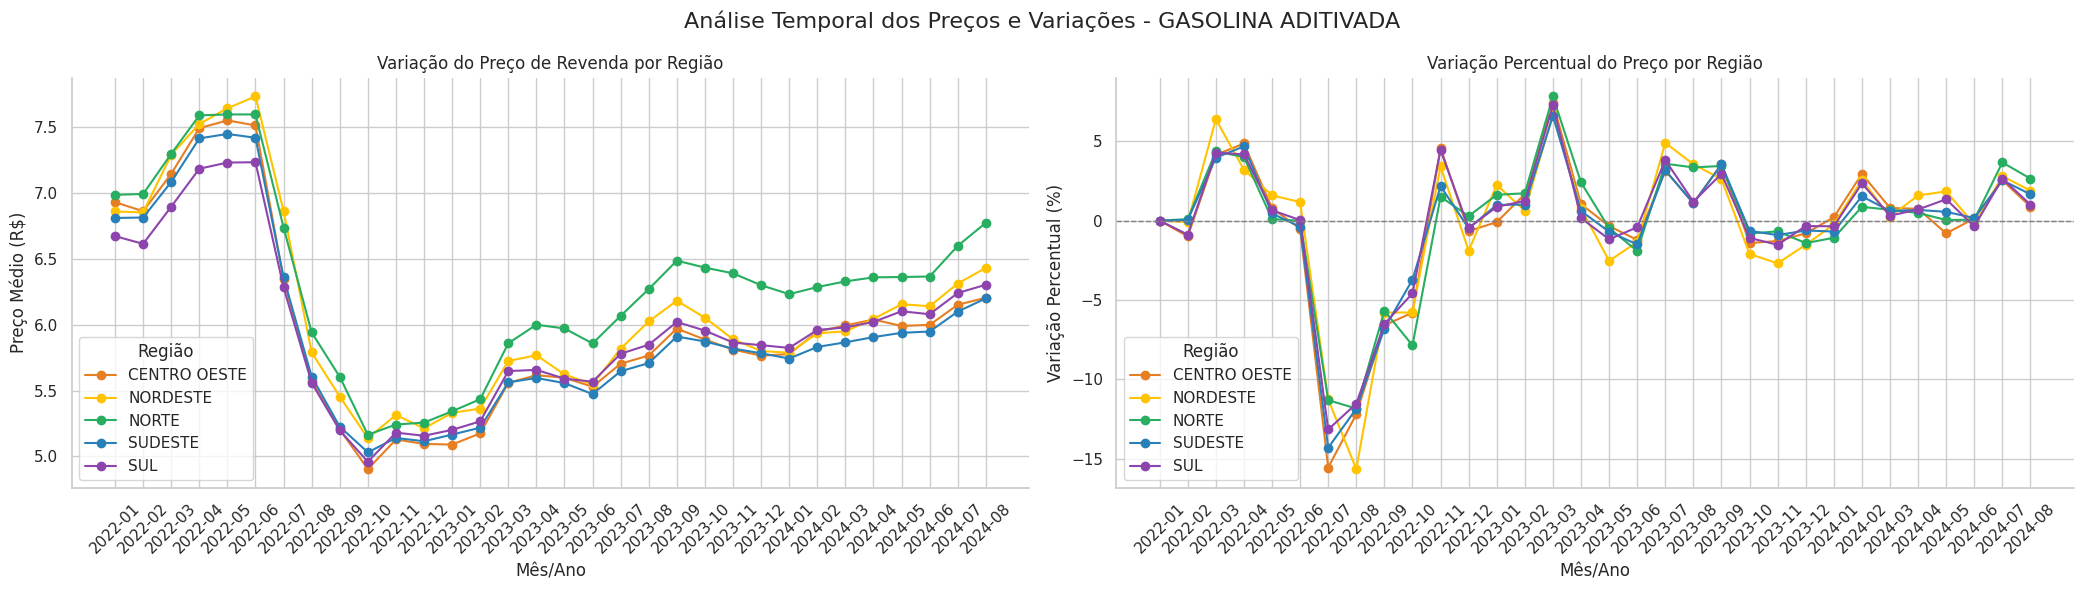

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0  CENTRO OESTE      0.721884     4.904000     7.552413     5.979434   
1      NORDESTE      0.707638     5.139459     7.734282     6.111882   
2       SUDESTE      0.683937     5.031441     7.449420     5.947921   
3         NORTE      0.671542     5.164889     7.597978     6.304741   
4           SUL      0.609502     4.960000     7.234911     5.967047   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       5.849723      12.072780  
1       5.942950      11.578065  
2       5.825739      11.498751  
3       6.315162      10.651374  
4       5.910623      10.214470

In [29]:
# GASOLINA ADITIVADA
df_variacao = calcular_variacao_mensal_por_produto(
    "GASOLINA ADITIVADA", df_combustivel
)

plot_variacao_precos_combustivel_regiao(
    "GASOLINA ADITIVADA",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços da Gasolina Aditivada (2022-2024)

A análise da volatilidade dos preços da gasolina aditivada no Brasil, entre 2022 e 2024, revela variações significativas entre as regiões do país. Durante esse período, o menor preço registrado foi de R\\$ 4,90 na região Centro-Oeste, enquanto o maior preço alcançou R\\$ 7,73 no Nordeste. A região Norte também se destacou, apresentando uma média elevada de R\\$ 6,30, enquanto o Centro-Oeste teve a menor média, de R\\$ 5,98. Quando analisada a volatilidade, o Centro-Oeste apresentou o maior desvio padrão (0,72), indicando maior instabilidade nos preços. Já o Sul foi a região mais estável, com um desvio padrão de 0,61.

A evolução dos preços de revenda mostra uma queda acentuada ao longo de 2022, seguida por uma recuperação no início de 2023, que levou à estabilização dos preços em patamares mais altos ao longo de 2024. As curvas de variação percentual também apontam momentos de forte oscilação, embora o comportamento geral tenha sido relativamente similar entre as regiões, com variações na intensidade e nos momentos dos ajustes.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Durante o período analisado, inicialmente observou-se uma tendência de queda nos preços médios da gasolina aditivada em todas as regiões, especialmente no segundo semestre de 2022. No entanto, no início de 2023, essa tendência se inverteu, com os preços subindo e permanecendo relativamente estáveis e em níveis mais elevados ao longo de 2024.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  A região Centro-Oeste registrou a maior volatilidade de preços, com um desvio padrão de 0,72, evidenciando oscilações mais altas nos valores de revenda. Em contraste, o Sul se destacou como a região mais estável, com uma volatilidade de 0,61, indicando que as variações mensais de preços foram menos intensas nesse mercado.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  O maior preço médio registrado foi no Norte, com R\\$ 6,30, enquanto o menor preço médio foi no Centro-Oeste, com R\\$ 5,98. Considerando valores individuais, o maior preço foi de R\\$ 7,73 no Nordeste, e o menor, R\\$ 4,90 no Centro-Oeste, evidenciando disparidades regionais influenciadas por condições locais de mercado.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim, durante o segundo semestre de 2022, registraram-se quedas expressivas superiores a 8% em algumas regiões, principalmente no Centro-Oeste e Nordeste. Já no início de 2023, houve um movimento de alta nos preços, com aumentos progressivos em todas as regiões, caracterizando um período de recuperação acentuada antes de se atingir um patamar de relativa estabilidade.

### Combustível: GASOLINA COMUM

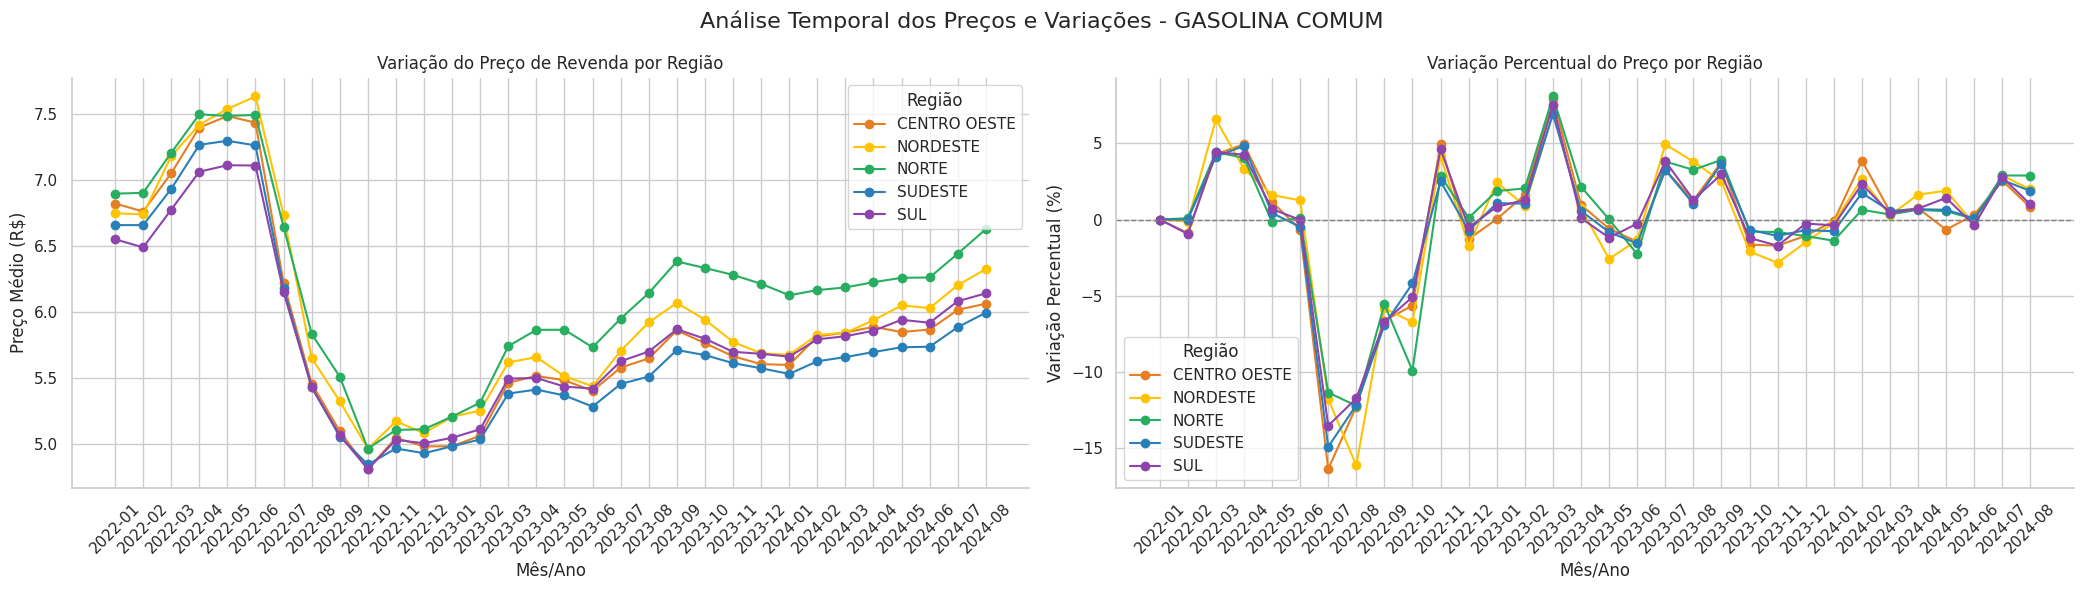

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0  CENTRO OESTE      0.729749     4.807714     7.486839     5.860186   
1      NORDESTE      0.715998     4.963378     7.635703     5.995606   
2       SUDESTE      0.696124     4.842565     7.299247     5.760299   
3         NORTE      0.685348     4.963333     7.500133     6.187046   
4           SUL      0.618929     4.807579     7.113574     5.818069   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       5.713935      12.452656  
1       5.834168      11.942052  
2       5.619069      12.084854  
3       6.200049      11.077152  
4       5.746072      10.638043

In [30]:
# GASOLINA COMUM
df_variacao = calcular_variacao_mensal_por_produto(
    "GASOLINA COMUM", df_combustivel
)

plot_variacao_precos_combustivel_regiao(
    "GASOLINA COMUM",
    df_variacao,
)
calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços da Gasolina Comum (2022-2024)
A análise dos preços da gasolina comum no Brasil entre 2022 e 2024 revela diferenças significativas entre as regiões do país. No período, o menor preço médio registrado foi de R\\$ 4,81 no Centro-Oeste, enquanto o maior chegou a R\\$ 7,64 no Nordeste. A região Norte apresentou a média de preço mais alta, com R\\$ 6,19, enquanto o Sudeste teve a menor, com R\\$ 5,76. Quando se trata da instabilidade dos preços, o Centro-Oeste foi o mais volátil, com um desvio padrão de 0,73. Já o Sul apresentou maior estabilidade, com um desvio padrão de 0,62.

Os gráficos indicam uma tendência inicial de queda ao longo de 2022, similar ao que foi observado em outros combustíveis. No início de 2023, os preços começaram a subir novamente, alcançando níveis mais altos e, em seguida, estabilizando-se acima dos valores anteriores. Apesar de as regiões apresentarem comportamentos semelhantes ao longo do tempo, as diferenças nos níveis médios de preços e nas amplitudes de variação são evidentes.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço da combustível?**

  No período analisado, foi observada uma tendência geral de queda nos preços médios da gasolina comum em todas as regiões, especialmente durante o segundo semestre de 2022. A partir de 2023, os preços começaram a subir, recuperando parte das perdas anteriores e atingindo um novo patamar de estabilidade em níveis mais altos, comportamento que se manteve até 2024.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**
  
  A região Centro-Oeste foi a que apresentou maior volatilidade nos preços, com um desvio padrão de 0,73, o que indica variações mais acentuadas nos valores mensais. Em contrapartida, o Sul se destacou pela estabilidade, com um desvio padrão de 0,62, refletindo oscilações mais moderadas ao longo do tempo.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  A região Norte teve a média de preços mais alta no período, com R\\$ 6,19, enquanto o Sudeste apresentou a menor média, com R\\$ 5,76. Em termos absolutos, o valor máximo registrado foi de R\\$ 7,64 no Nordeste, e o mínimo, de R\\$ 4,81 no Centro-Oeste.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim. Durante o segundo semestre de 2022, foram registradas quedas significativas superiores a 8% em várias regiões, com destaque para o Centro-Oeste e o Nordeste. Já no início de 2023, houve uma recuperação expressiva, com aumentos graduais nos preços em todas as regiões, marcando um período de alta seguido por estabilização.

### Combustível: GLP

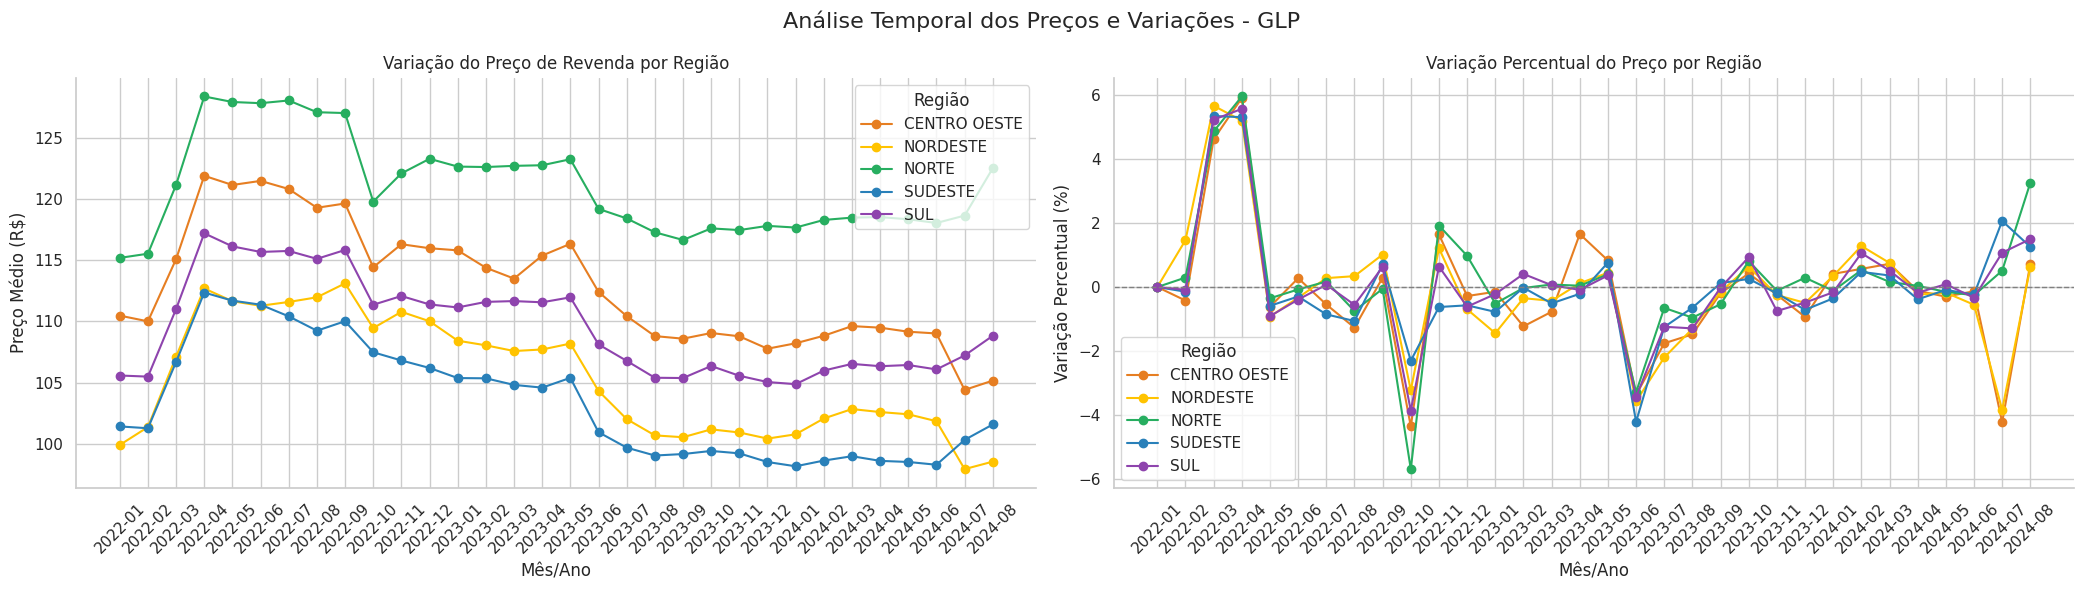

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0  CENTRO OESTE      4.968007   104.402500   121.902041   112.866971   
1      NORDESTE      4.786064    97.931053   113.109368   105.312198   
2       SUDESTE      4.682506    98.162880   112.359210   103.423207   
3         NORTE      3.983434   115.193218   128.384506   121.011859   
4           SUL      3.973986   104.873158   117.201472   109.546658   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0     111.443709       4.401648  
1     103.577899       4.544643  
2     101.499196       4.527519  
3     119.494741       3.291771  
4     108.474074       3.627665

In [31]:
# GLP
df_variacao = calcular_variacao_mensal_por_produto("GLP", df_combustivel)

plot_variacao_precos_combustivel_regiao(
    "GLP",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços do GLP (2022-2024)
A análise dos preços do GLP (Gás Liquefeito de Petróleo) no Brasil, entre os anos de 2022 e 2024, mostra comportamentos distintos entre as regiões, com uma ordem bem definida em relação aos valores médios. Nesse período, o menor preço médio foi registrado no Nordeste, com R\\$ 97,93, enquanto o maior foi de R\\$ 128,38 na região Norte. A média mais elevada também pertence ao Norte, com R\\$ 121,01, e a mais baixa foi observada no Sudeste, com R\\$ 103,42. No quesito volatilidade, o Centro-Oeste teve o maior desvio padrão (4,97), sinalizando maior instabilidade nos preços. Em contrapartida, o Sul demonstrou maior estabilidade, com um desvio padrão de 3,97.

Um dado interessante é a consistência na distribuição dos preços médios entre as regiões, que seguiram uma ordem decrescente quase linear: Norte ➔ Centro-Oeste ➔ Sul ➔ Nordeste ➔ Sudeste. Essa sequência se manteve ao longo dos anos analisados, refletindo diferenças estruturais entre os mercados regionais. Em relação à variação ao longo do tempo, os gráficos apontam para uma queda acentuada nos preços ao longo de 2022, seguida por uma leve recuperação e posterior estabilização a partir do início de 2023.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Sim. Durante o período analisado, observou-se inicialmente uma queda nos preços médios em todas as regiões, com destaque para o ano de 2022. A partir do início de 2023, os preços começaram a se estabilizar e passaram por uma leve recuperação, alcançando níveis um pouco mais altos e mantendo pequenas oscilações nos meses seguintes.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  O Centro-Oeste apresentou a maior instabilidade nos preços do GLP, com um desvio padrão de 4,97, o que indica oscilações mais expressivas ao longo do período. Por outro lado, a região Sul foi a mais estável, com menor variação nos preços mensais, refletida em um desvio padrão de 3,97.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  A região Norte foi a que apresentou os preços médios mais altos durante todo o período, com uma média de R\\$ 121,01 e um valor máximo de R\\$ 128,38. Já a região Sudeste teve os menores valores, com média de R\\$ 103,42 e valores mínimos em torno de R\\$ 98,16, evidenciando uma clara hierarquia regional nos preços do GLP.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim, durante o segundo semestre de 2022, foram registradas quedas expressivas nos preços do GLP, superando 5% em várias regiões, especialmente no Centro-Oeste e Nordeste. Já no início de 2023, observou-se uma leve alta nos preços em todas as regiões, configurando um padrão de recuperação moderada, porém mais suave do que o observado em combustíveis como gasolina ou etanol.

### Combustível: GNV


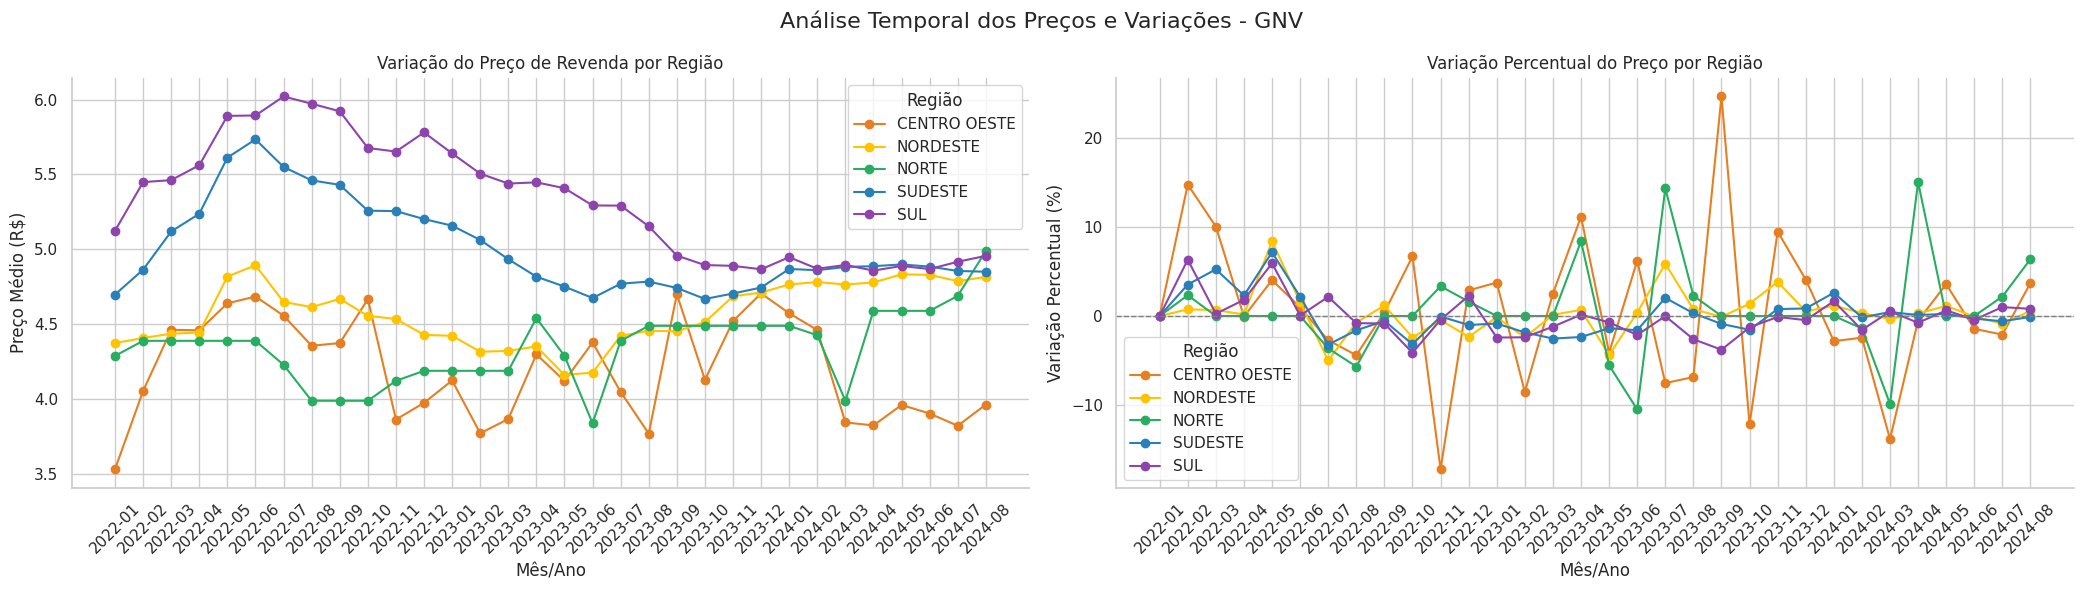

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0           SUL      0.394896     4.858661     6.020305     5.325117   
1  CENTRO OESTE      0.339761     3.534182     4.706667     4.201572   
2       SUDESTE      0.297930     4.669418     5.733969     5.007489   
3         NORTE      0.242422     3.840000     4.990000     4.349766   
4      NORDESTE      0.205801     4.162182     4.894158     4.568905   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       5.350719       7.415733  
1       4.127778       8.086518  
2       4.884075       5.949696  
3       4.390000       5.573215  
4       4.546351       4.504379

In [32]:
# GNV
df_variacao = calcular_variacao_mensal_por_produto("GNV", df_combustivel)

plot_variacao_precos_combustivel_regiao(
    "GNV",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços do GNV (2022-2024)

A análise da volatilidade dos preços do Gás Natural Veicular (GNV) no Brasil entre 2022 e 2024 revela um comportamento mais estável em comparação aos combustíveis líquidos, com oscilações moderadas entre as regiões. Durante o período, o menor preço médio registrado foi de R\\$ 3,53 na região Centro-Oeste, enquanto o maior preço médio foi de R\\$ 6,02 na região Sul. A média de preço mais elevada pertence ao Sul, com R\\$ 5,33, enquanto o Centro-Oeste apresentou a menor média, com R\\$ 4,20. No que tange à volatilidade, o Sul apresentou o maior desvio padrão (0,39), indicando maior instabilidade, enquanto o Nordeste demonstrou a maior estabilidade, com uma volatilidade de 0,21.

Os gráficos mostram que o GNV passou por uma queda gradual ao longo de 2022, com uma leve recuperação no início de 2023. Este movimento de alta, entretanto, foi menos intenso que o observado em outros combustíveis, resultando numa trajetória geral de maior estabilidade. As diferenças regionais são menos acentuadas, mas ainda perceptíveis, sobretudo no comportamento do Sul, que exibiu maior dispersão dos preços ao longo do período.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Durante o período analisado, observou-se uma tendência geral de queda nos preços médios do GNV em todas as regiões durante o ano de 2022. No início de 2023, houve uma leve recuperação nos preços, contudo de maneira muito mais moderada que nos combustíveis líquidos. Essa recuperação estabilizou-se rapidamente, resultando em uma trajetória de alta estabilidade no decorrer de 2023 e 2024.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  A região Sul apresentou a maior volatilidade nos preços do GNV, com um desvio padrão de 0,39, evidenciando variações mais acentuadas nos preços médios. Em contraste, a região Nordeste foi a mais estável, apresentando um desvio padrão de 0,21, refletindo uma trajetória de preços bastante linear e de baixa dispersão.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  O Sul apresentou os preços médios mais altos ao longo do período, com uma média de R\\$ 5,33 e um pico de R\\$ 6,02. Já o Centro-Oeste teve os menores valores, com média de R\\$ 4,20 e o preço mínimo de R\\$ 3,53. Essas diferenças, embora moderadas, ainda revelam disparidades importantes entre as regiões.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim. Apesar da maior estabilidade do GNV em relação a outros combustíveis, o Centro-Oeste apresentou momentos de forte oscilação nos preços. Entre o segundo semestre de 2022 e partes de 2023, foram registradas variações superiores a +20% em altas e até -15% em quedas. Nas demais regiões, as mudanças foram mais suaves, geralmente inferiores a 5%, mantendo um padrão de relativa estabilidade.

### Combustível: OLEO DIESEL

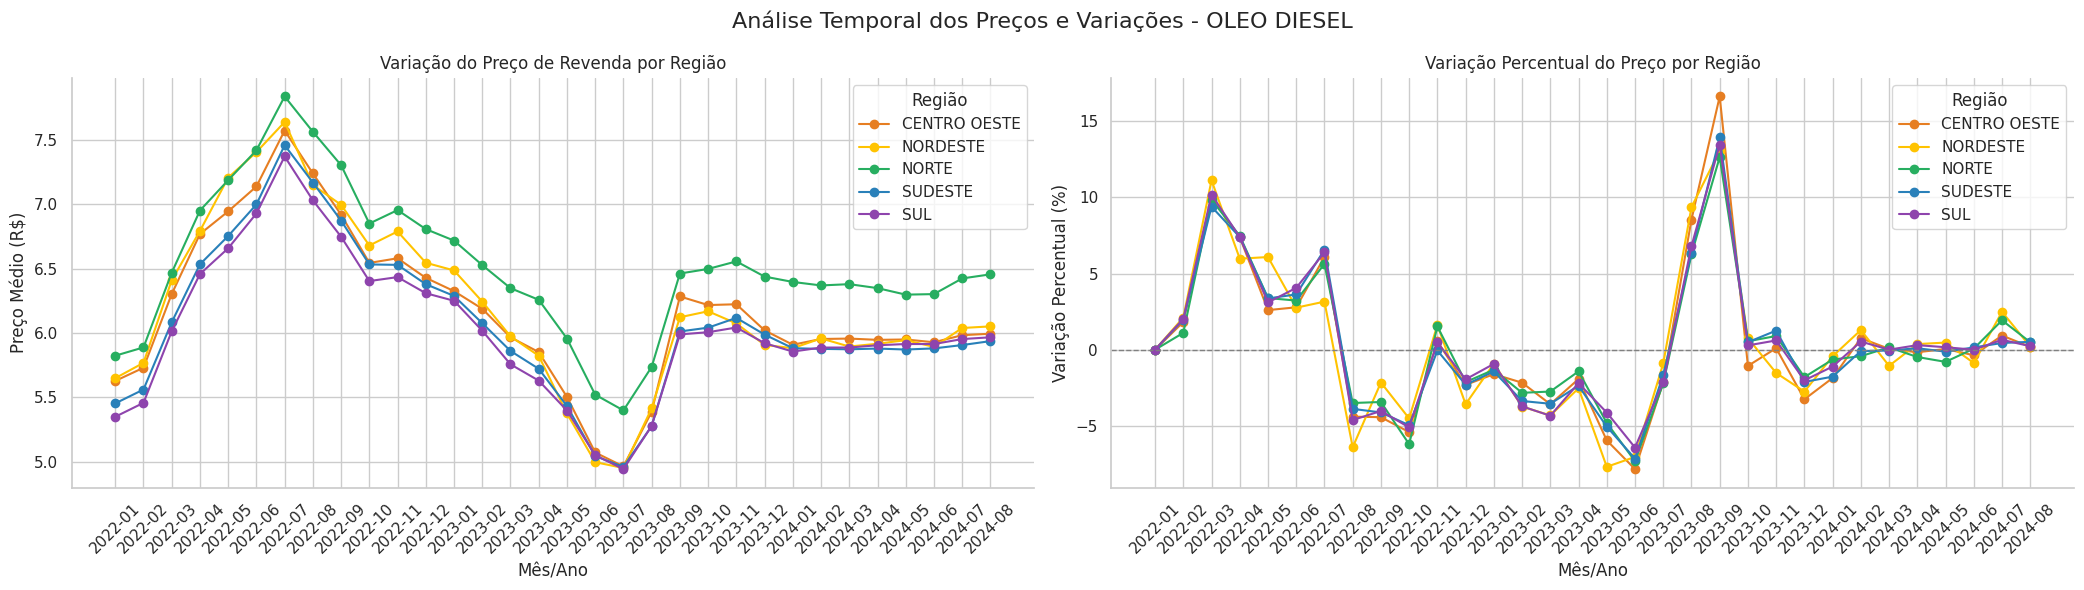

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0      NORDESTE      0.644857     4.952203     7.640831     6.193288   
1  CENTRO OESTE      0.589284     4.964444     7.574268     6.170638   
2       SUDESTE      0.576657     4.960624     7.460335     6.071525   
3         NORTE      0.558899     5.399512     7.839257     6.515307   
4           SUL      0.550815     4.943510     7.373038     6.023936   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       6.046337      10.412192  
1       6.008682       9.549805  
2       5.963544       9.497725  
3       6.448270       8.578243  
4       5.960914       9.143769

In [33]:
# OLEO DIESEL
df_variacao = calcular_variacao_mensal_por_produto(
    "OLEO DIESEL", df_combustivel
)

plot_variacao_precos_combustivel_regiao(
    "OLEO DIESEL",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços do Óleo Diesel (2022-2024)
A variação dos preços do óleo diesel no Brasil entre 2022 e 2024 apresentou diferenças relevantes entre as regiões do país. Nesse período, o menor preço médio foi de R\\$ 4,94 na região Sul, enquanto o maior ficou em R\\$ 7,83 na região Norte. A média de preços mais alta também foi registrada no Norte, com R\\$ 6,52, e a mais baixa no Sul, com R\\$ 6,02. Quando se trata de volatilidade, o Nordeste teve os preços mais instáveis, com um desvio padrão de 0,64. Por outro lado, o Sul novamente se destacou como a região mais estável, com menor variação e desvio padrão de 0,55.

Ao observar a evolução dos preços ao longo do tempo, nota-se um aumento acentuado no primeiro semestre de 2022, quando os valores atingiram os maiores picos em todas as regiões. No segundo semestre do mesmo ano, os preços começaram a cair de forma significativa. Em 2023, houve uma recuperação gradual, sendo essa retomada mais perceptível no Norte. Embora o comportamento dos preços tenha seguido um padrão parecido entre as regiões, as diferenças nos valores médios e na intensidade das variações foram claras.

### Combustível: OLEO DIESEL S10

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Ao longo do período analisado, o preço do óleo diesel passou por uma alta significativa no primeiro semestre de 2022. Em seguida, houve uma queda acentuada a partir da segunda metade do ano. Em 2023, os preços começaram a se recuperar de forma gradual, alcançando uma estabilidade em patamares ainda elevados no início de 2024.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  O Nordeste foi a região com maior volatilidade, apresentando um desvio padrão de 0,64, o que indica oscilações mais intensas nos preços mensais. Já o Sul teve o comportamento mais estável, com variações mais moderadas e desvio padrão de 0,55.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  A região Norte liderou com os preços médios mais altos do período, alcançando R\\$ 6,52 e registrando um pico de R\\$ 7,83. Em contrapartida, o Sul teve os menores preços médios, com R\\$ 6,02, e também o menor valor registrado, de R\\$ 4,94. Esses dados mostram uma diferença considerável entre as regiões.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim. No primeiro semestre de 2022, houve uma disparada nos preços em todas as regiões, impulsionada por fatores externos do mercado global. Já no segundo semestre, os preços caíram de forma expressiva — em algumas regiões, como o Centro-Oeste e o Nordeste, as quedas passaram de 10%. Em 2023, os valores começaram a se recuperar lentamente, mas sem oscilações tão bruscas quanto no ano anterior.

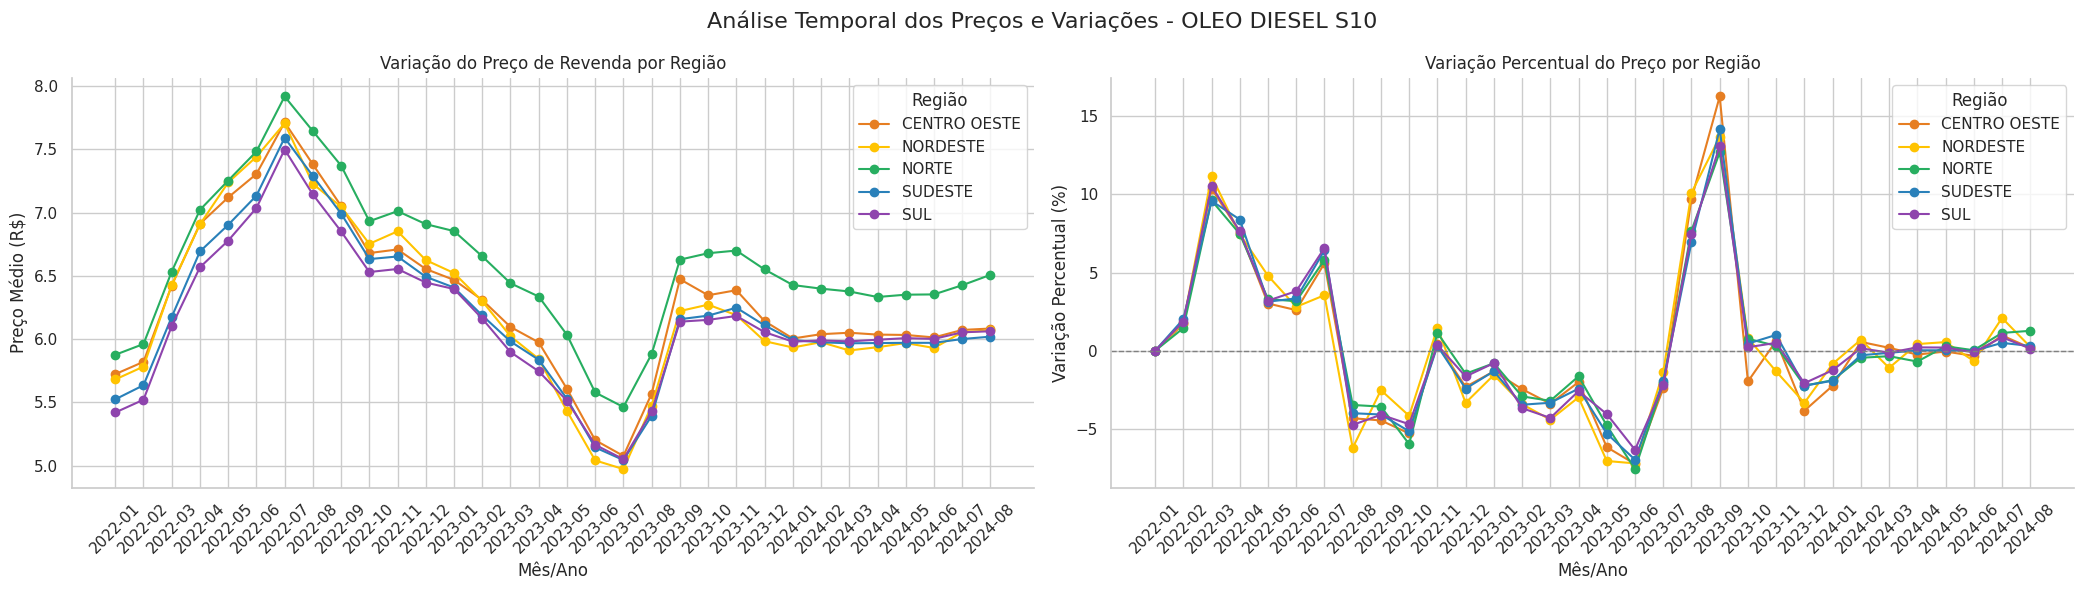

REGIÃO  VOLATILIDADE  MENOR_PREÇO  MAIOR_PREÇO  MEDIA_PREÇO  \
0      NORDESTE      0.653656     4.972043     7.706068     6.241890   
1  CENTRO OESTE      0.602362     5.076316     7.713822     6.292977   
2       SUDESTE      0.589658     5.043643     7.592145     6.181280   
3         NORTE      0.563029     5.462905     7.918508     6.590399   
4           SUL      0.555080     5.050308     7.499031     6.137731   

   MEDIANA_PREÇO  CV_PERCENTUAL  
0       6.061845      10.472088  
1       6.119069       9.571971  
2       6.064030       9.539415  
3       6.520919       8.543168  
4       6.058608       9.043735

In [34]:
# OLEO DIESEL S10
df_variacao = calcular_variacao_mensal_por_produto(
    "OLEO DIESEL S10", df_combustivel
)

plot_variacao_precos_combustivel_regiao(
    "OLEO DIESEL S10",
    df_variacao,
)

calcular_volatilidade(df_variacao)

#### Análise da Volatilidade dos Preços do Óleo Diesel S10 (2022–2024)
A análise dos preços do óleo diesel S10 no Brasil entre 2022 e 2024 aponta variações expressivas tanto nos valores médios quanto na estabilidade entre as diferentes regiões. Nesse período, o menor preço médio foi registrado no Nordeste, com R\\$ 4,97, enquanto o maior foi de R\\$ 7,92 na região Norte, que também apresentou a maior média geral: R\\$ 6,59. Já a menor média ficou com a região Sul, com R\\$ 6,14. Quando se trata de volatilidade, o Nordeste foi a região com maior instabilidade, apresentando um desvio padrão de 0,65. Por outro lado, o Sul se destacou como a região mais estável, com um índice de 0,56.

De acordo com os gráficos de evolução dos preços, o diesel S10 sofreu uma forte alta no primeiro semestre de 2022, atingindo os valores mais elevados em todas as regiões. Essa alta foi seguida por uma queda significativa ao longo do primeiro semestre de 2023, marcando um dos pontos de inflexão mais expressivos entre os combustíveis analisados. A partir da segunda metade de 2023, os preços começaram a se recuperar de forma moderada, apresentando sinais de estabilização até o início de 2024. Apesar das diferenças nos valores entre as regiões, o padrão de variação temporal foi bastante semelhante.

1. **Houve tendência geral de queda, estabilidade ou aumento no preço do combustível?**

  Sim. No início do período, houve uma forte alta nos preços do diesel S10, com picos no primeiro semestre de 2022. Em seguida, os preços caíram de forma acentuada no primeiro semestre de 2023. A partir do segundo semestre desse ano, os valores se recuperaram moderadamente e se mantiveram estáveis até 2024.

2. **Quais regiões apresentaram maior volatilidade e maior estabilidade?**

  O Nordeste foi a região com maior volatilidade no período, com um desvio padrão de 0,65, indicando variações mais intensas nos preços. Já o Sul foi a região mais estável, com um desvio padrão de 0,56, o que demonstra oscilações menos pronunciadas. No entanto, essa diferença entre as regiões foi menor do que a observada em outros combustíveis.

3. **Qual região teve os preços mais altos e qual teve os mais baixos?**

  A região Norte registrou os preços mais elevados, com uma média de R\\$ 6,59 e um pico de R\\$ 7,92. Por outro lado, o Nordeste teve os preços médios mais baixos, com média de R\\$ 6,24 e um valor mínimo de R\\$ 4,97. Isso representa uma diferença de mais de R\\$ 1,60 entre as regiões com extremos opostos.

4. **Existiram momentos de forte variação (alta ou baixa) concentrados em algumas regiões?**

  Sim. Em todas as regiões, foi observado um padrão claro de alta expressiva nos preços no primeiro semestre de 2022, seguida por uma queda acentuada no primeiro semestre de 2023. As oscilações foram particularmente intensas no Centro-Oeste e no Nordeste, onde foram registradas variações mensais superiores a 10%. Após esse período, os preços se estabilizaram e a volatilidade diminuiu consideravelmente.

## Comparação Regional dos Combustíveis

### `[código-fonte]`

In [35]:
def gerar_resumo_regional_combustiveis(df):
    combustiveis = df["PRODUTO"].unique()
    resultados = []

    for combustivel in combustiveis:
        # Calcula métricas para o combustível atual
        df_variacao = calcular_variacao_mensal_por_produto(combustivel, df)
        df_volatilidade = calcular_volatilidade(df_variacao)

        # Encontra regiões com extremos estatísticos
        maior_volatilidade = df_volatilidade.loc[
            df_volatilidade["VOLATILIDADE"].idxmax(), "REGIÃO"
        ]
        menor_volatilidade = df_volatilidade.loc[
            df_volatilidade["VOLATILIDADE"].idxmin(), "REGIÃO"
        ]
        maior_preco_medio = df_volatilidade.loc[
            df_volatilidade["MEDIA_PREÇO"].idxmax(), "REGIÃO"
        ]
        menor_preco_medio = df_volatilidade.loc[
            df_volatilidade["MEDIA_PREÇO"].idxmin(), "REGIÃO"
        ]
        maior_cv_percentual = df_volatilidade.loc[
            df_volatilidade["CV_PERCENTUAL"].idxmax(), "REGIÃO"
        ]
        menor_cv_percentual = df_volatilidade.loc[
            df_volatilidade["CV_PERCENTUAL"].idxmin(), "REGIÃO"
        ]

        resultados.append(
            {
                "COMBUSTIVEL": combustivel,
                "MAIOR_VOLATILIDADE": maior_volatilidade,
                "MENOR_VOLATILIDADE": menor_volatilidade,
                "MAIOR_PRECO_MEDIO": maior_preco_medio,
                "MENOR_PRECO_MEDIO": menor_preco_medio,
                "MAIOR_CV": maior_cv_percentual,
                "MENOR_CV": menor_cv_percentual,
            }
        )

    return pd.DataFrame(resultados)

In [36]:
def plot_heatmap_frequencia_regional(df):
    """
    Gera um heatmap mostrando a frequência com que cada região aparece como destaque para diferentes critérios (volatilidade, preço médio) por tipo de combustível.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados do resumo.
    """
    # Criar matriz de contagem
    matriz_contagem = (
        df.drop(columns="COMBUSTIVEL")
        .apply(pd.Series.value_counts)
        .fillna(0)
        .astype(int)
        .T
    )

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        matriz_contagem,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        linewidths=0.5,
        linecolor="lightgray",
    )

    # Personalizar o gráfico
    ax.set_title(
        "Frequência de Regiões em Destaque por Critério", pad=20, fontsize=16
    )
    ax.set_xlabel("Região", fontsize=12)
    ax.set_ylabel("Critério de Destaque", fontsize=12)

    # Ajustar layout
    plt.tight_layout()

    plt.show()

In [37]:
def plot_cv_combustiveis_regioes(df):
    """
    Gera um gráfico de barras agrupadas mostrando o Coeficiente de Variação (%) por combustível e por região.

    Parâmetros:
    df (pd.DataFrame): O DataFrame contendo os dados de preços dos combustíveis.
    """

    # Processamento dos dados
    dados_cv = []
    for combustivel in df["PRODUTO"].unique():
        df_variacao = calcular_variacao_mensal_por_produto(combustivel, df)
        df_volatilidade = calcular_volatilidade(df_variacao)

        for _, row in df_volatilidade.iterrows():
            dados_cv.append(
                {
                    "COMBUSTÍVEL": combustivel,
                    "REGIÃO": row["REGIÃO"],
                    "CV (%)": row["CV_PERCENTUAL"],
                }
            )

    df_cv = pd.DataFrame(dados_cv)

    # Configurar o gráfico
    plt.figure(figsize=(14, 8))
    ax = sns.barplot(
        data=df_cv,
        y="COMBUSTÍVEL",
        x="CV (%)",
        hue="REGIÃO",
        palette={
            "NORTE": "#27AE60",
            "NORDESTE": "#FFC300",
            "CENTRO OESTE": "#E67E22",
            "SUDESTE": "#2980B9",
            "SUL": "#8E44AD",
        },
        errorbar=None,
    )

    # Customização do gráfico
    ax.set_title(
        "Comparativo do Coeficiente de Variação (%) dos Combustíveis por Região",
        fontsize=16,
        pad=20,
    )
    ax.set_xlabel("Coeficiente de Variação (%)", labelpad=10)
    ax.set_ylabel("Combustível", labelpad=10)
    plt.grid(True)
    sns.despine(top=True, right=True)

    # Ajustar layout
    plt.tight_layout()

    plt.show()

### Regiões em Destaque por Critério

In [38]:
df_resumo = gerar_resumo_regional_combustiveis(df_combustivel)
df_resumo

COMBUSTIVEL MAIOR_VOLATILIDADE MENOR_VOLATILIDADE MAIOR_PRECO_MEDIO  \
0    ETANOL HIDRATADO                SUL            SUDESTE             NORTE   
1  GASOLINA ADITIVADA       CENTRO OESTE                SUL             NORTE   
2      GASOLINA COMUM       CENTRO OESTE                SUL             NORTE   
3                 GLP       CENTRO OESTE                SUL             NORTE   
4                 GNV                SUL           NORDESTE               SUL   
5         OLEO DIESEL           NORDESTE                SUL             NORTE   
6     OLEO DIESEL S10           NORDESTE                SUL             NORTE   

  MENOR_PRECO_MEDIO      MAIOR_CV  MENOR_CV  
0      CENTRO OESTE  CENTRO OESTE     NORTE  
1           SUDESTE  CENTRO OESTE       SUL  
2           SUDESTE  CENTRO OESTE       SUL  
3           SUDESTE      NORDESTE     NORTE  
4      CENTRO OESTE  CENTRO OESTE  NORDESTE  
5               SUL      NORDESTE     NORTE  
6               SUL      NORDESTE     NORTE

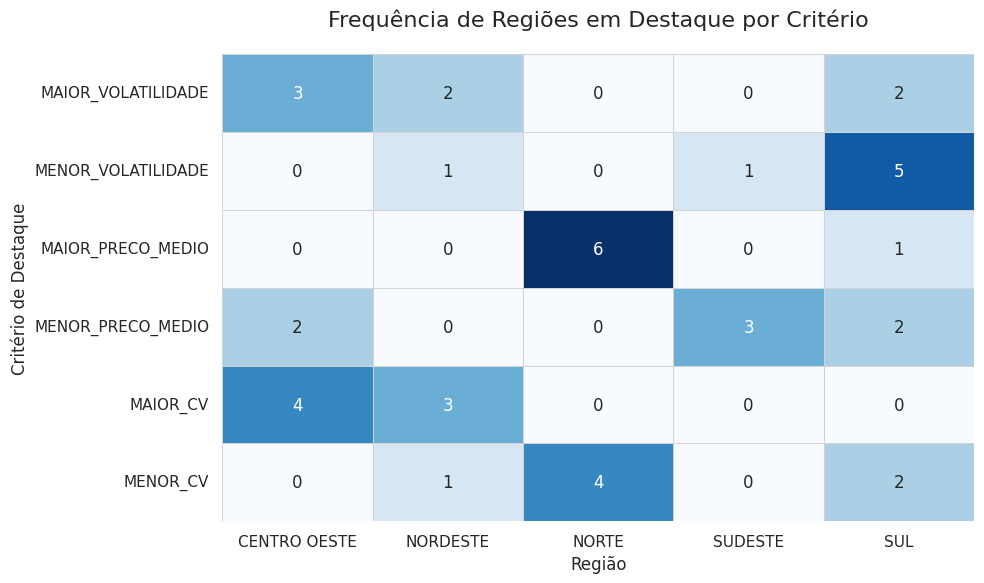

In [39]:
plot_heatmap_frequencia_regional(df_resumo)

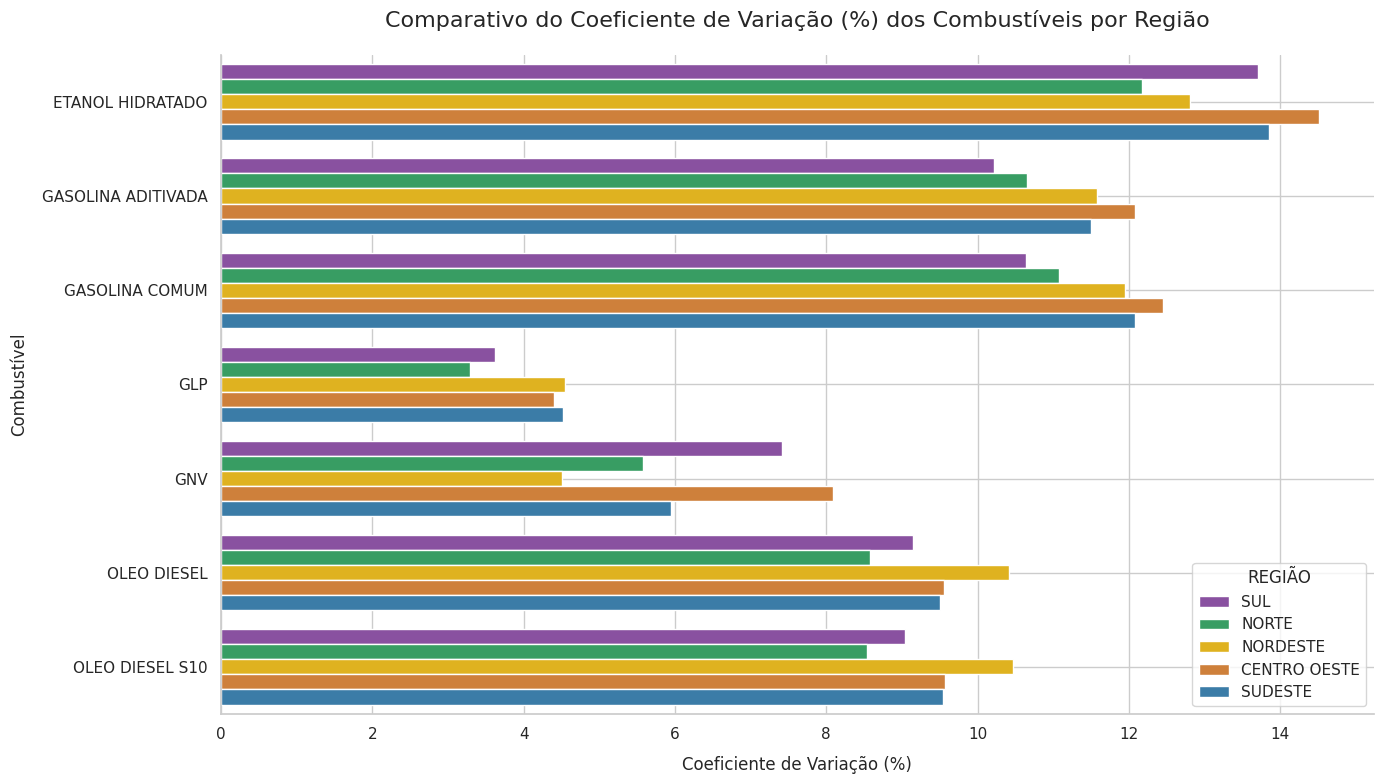

In [40]:
plot_cv_combustiveis_regioes(df_combustivel)

### Análise do Coeficiente de Variação dos Combustíveis por Região

O Coeficiente de Variação (CV) é uma maneira de entender o quanto os preços mudam em relação à média. Diferente do desvio padrão, que mostra a variação em reais, o CV mostra essa variação de forma proporcional ao valor médio. Isso ajuda a comparar diferentes regiões ou produtos, mesmo que tenham preços muito diferentes entre si.

**Regiões com maior e menor variação**

- **Centro-Oeste**: Teve o maior CV, ou seja, os preços dos combustíveis não só mudam bastante em reais, mas também em relação à média local. Isso indica uma instabilidade maior em todos os aspectos.

- **Nordeste**: Teve o menor CV, mostrando que, mesmo que os preços oscilem, essas mudanças são mais suaves quando comparadas à média da região. É interessante notar que o Sul teve a menor variação em reais (foi a mais estável em termos absolutos), mas ainda assim teve um CV maior que o do Nordeste. Ou seja, quando olhamos para a proporção, o Nordeste foi mais regular.

**Combustíveis mais e menos instáveis**

- **Etanol hidratado**: Foi o que apresentou maior CV, ou seja, seu preço é o mais imprevisível em relação à sua média. Isso acontece porque o etanol depende muito da safra agrícola (como a cana-de-açúcar) e também da oferta e demanda em cada região.

- **GLP (gás de cozinha)**: Teve o menor CV, indicando que seu preço é o mais estável, proporcionalmente. Isso pode ser explicado por fatores como maior regulação do setor, uma cadeia de distribuição bem organizada e um consumo mais regular em todo o país.

### Resumo Analítico

A análise comparativa dos dados de todos os combustíveis avaliados revelou padrões consistentes tanto nos preços quanto na volatilidade entre as diferentes regiões do Brasil. A região Sul se destacou como a mais estável, registrando os menores níveis de variação em cinco dos sete combustíveis analisados. Em contraste, o Centro-Oeste apresentou maior instabilidade, sendo a região mais volátil em três desses combustíveis.

Em relação aos preços médios de revenda, a região Norte concentrou os valores mais elevados, liderando esse indicador em seis dos sete combustíveis. Já a região Sudeste foi a que apresentou os menores preços médios, o que indica uma estrutura de mercado potencialmente mais acessível nessa área. Esse padrão recorrente reforça a existência de diferenças estruturais e logísticas entre as regiões, que impactam o comportamento dos preços dos combustíveis no país.

## Correlação entre Preço dos Combustíveis e a Quantidade de Postos Avaliados

### `[código-fonte]`

In [41]:
def agrupar_por_regiao_produto(df):
    # Agrupar dados por REGIÃO, PRODUTO e DATA FINAL

    df_agrupado = df.groupby(
        ["REGIÃO", "PRODUTO", "DATA FINAL"], as_index=False
    )[["NÚMERO DE POSTOS PESQUISADOS", "PREÇO MÉDIO REVENDA"]].mean()

    return df_agrupado

In [42]:
def calcular_correlacoes(df):
    resultados = []

    for (regiao, produto), grupo in df.groupby(["REGIÃO", "PRODUTO"]):
        if len(grupo) > 1:
            correlacao = grupo["NÚMERO DE POSTOS PESQUISADOS"].corr(
                grupo["PREÇO MÉDIO REVENDA"]
            )
            resultados.append(
                {"REGIÃO": regiao, "PRODUTO": produto, "CORRELAÇÃO": correlacao}
            )

    df_correlacoes = pd.DataFrame(resultados)

    return df_correlacoes

In [43]:
def extrair_top_correlacoes(df_correlacoes, tipo):
    """
    Retorna os top 5 pares (região, produto) com base no tipo de correlação: positivas, negativas ou neutras.
    """
    df = df_correlacoes.copy()

    if tipo == "positivas":
        return df.sort_values(by="CORRELAÇÃO", ascending=False).head(5)
    elif tipo == "negativas":
        return df.sort_values(by="CORRELAÇÃO", ascending=True).head(5)
    elif tipo == "neutras":
        df["DISTANCIA_ZERO"] = df["CORRELAÇÃO"].abs()
        return (
            df.sort_values(by="DISTANCIA_ZERO")
            .drop(columns="DISTANCIA_ZERO")
            .head(5)
        )
    else:
        raise ValueError(
            "Tipo inválido. Use 'positivas', 'negativas' ou 'neutras'."
        )

In [44]:
def plot_heatmap_correlacao_precos(df):
    """
    Gera um heatmap mostrando a correlação entre número de postos avaliados e preço médio
    por tipo de combustível e por região.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas REGIÃO, PRODUTO, CORRELAÇÃO.
    """
    # Criar matriz de correlação (produtos como linhas, regiões como colunas)
    matriz_correlacao = df.pivot(
        index="PRODUTO", columns="REGIÃO", values="CORRELAÇÃO"
    )

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.heatmap(
        matriz_correlacao,
        annot=True,
        fmt=".2f",
        cmap="Blues",
        linewidths=0.5,
        linecolor="lightgray",
        cbar=True,
    )

    # Personalizar o gráfico
    ax.set_title(
        "Correlação entre Preço Médio e Número de Postos Avaliados",
        pad=20,
        fontsize=16,
    )
    ax.set_xlabel("Região", fontsize=12)
    ax.set_ylabel("Combustível", fontsize=12)

    # Ajustar layout
    plt.tight_layout()

    plt.show()

In [45]:
def plot_scatter_correlacao(df_agrupado, regiao, produto):
    """
    Gera um gráfico de dispersão entre número de postos avaliados e preço médio,
    com linha de tendência linear, para uma combinação específica de região e produto.

    Parâmetros:
    df_agrupado (pd.DataFrame): DataFrame contendo os dados agrupados com as colunas necessárias: ['REGIÃO', 'PRODUTO', 'NÚMERO DE POSTOS PESQUISADOS', 'PREÇO MÉDIO REVENDA']
    regiao (str): Nome da região a ser analisada (ex: 'SUDESTE')
    produto (str): Nome do produto combustível (ex: 'ETANOL HIDRATADO')
    """

    # Filtrar dados
    dados = df_agrupado[
        (df_agrupado["REGIÃO"] == regiao) & (df_agrupado["PRODUTO"] == produto)
    ]

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(
        data=dados,
        x="NÚMERO DE POSTOS PESQUISADOS",
        y="PREÇO MÉDIO REVENDA",
        scatter_kws={"s": 60, "alpha": 0.7, "color": "#3498DB"},  # Azul padrão
        line_kws={"color": "#E74C3C", "linewidth": 2},
        ci=95,  # Intervalo de confiança de 95%
    )

    # Adicionar coeficiente de correlação
    correlacao = dados["NÚMERO DE POSTOS PESQUISADOS"].corr(
        dados["PREÇO MÉDIO REVENDA"]
    )
    ax.annotate(
        f"Correlação: {correlacao:.2f}",
        xy=(0.05, 0.95),
        xycoords="axes fraction",
        fontsize=12,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )

    # Customização
    ax.set_title(
        f"{produto} - {regiao}: Preço Médio vs. Número de Postos Avaliados",
        fontsize=14,
        pad=20,
    )
    ax.set_xlabel("Número de Postos Pesquisados", labelpad=10)
    ax.set_ylabel("Preço Médio (R$)", labelpad=10)

    plt.grid(True)

    # Ajustar layout
    plt.tight_layout()

    sns.despine(top=True, right=True)
    plt.show()

### Análise da Correlação entre Preço dos Combustíveis e Quantidade de Postos Avaliados

In [46]:
df_agrupado = agrupar_por_regiao_produto(df_combustivel)
df_correlacoes = calcular_correlacoes(df_agrupado)

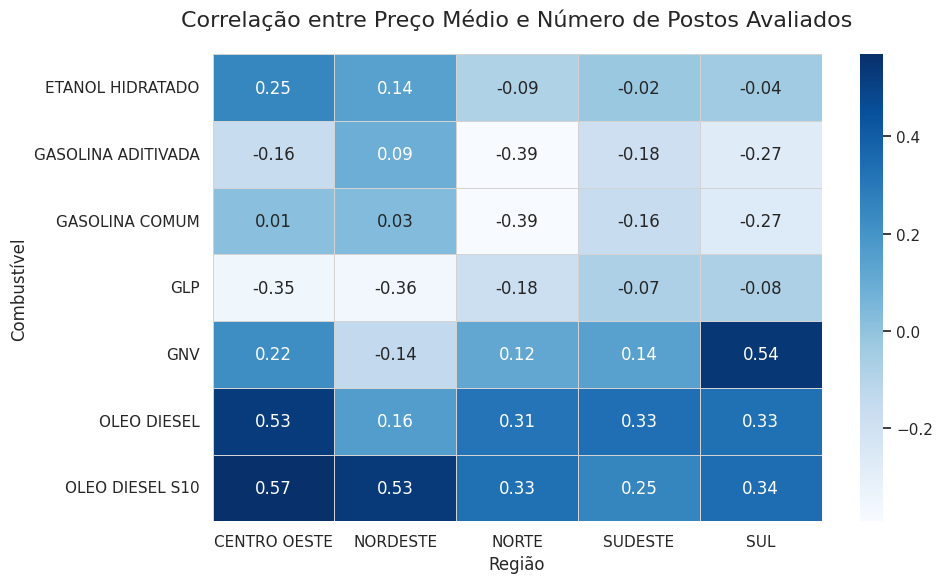

In [47]:
# Correlação
plot_heatmap_correlacao_precos(df_correlacoes)

In [48]:
# Top Correlações Positivas
extrair_top_correlacoes(df_correlacoes, "positivas")

REGIÃO          PRODUTO  CORRELAÇÃO
6   CENTRO OESTE  OLEO DIESEL S10    0.568968
32           SUL              GNV    0.541767
13      NORDESTE  OLEO DIESEL S10    0.532315
5   CENTRO OESTE      OLEO DIESEL    0.527347
34           SUL  OLEO DIESEL S10    0.340263

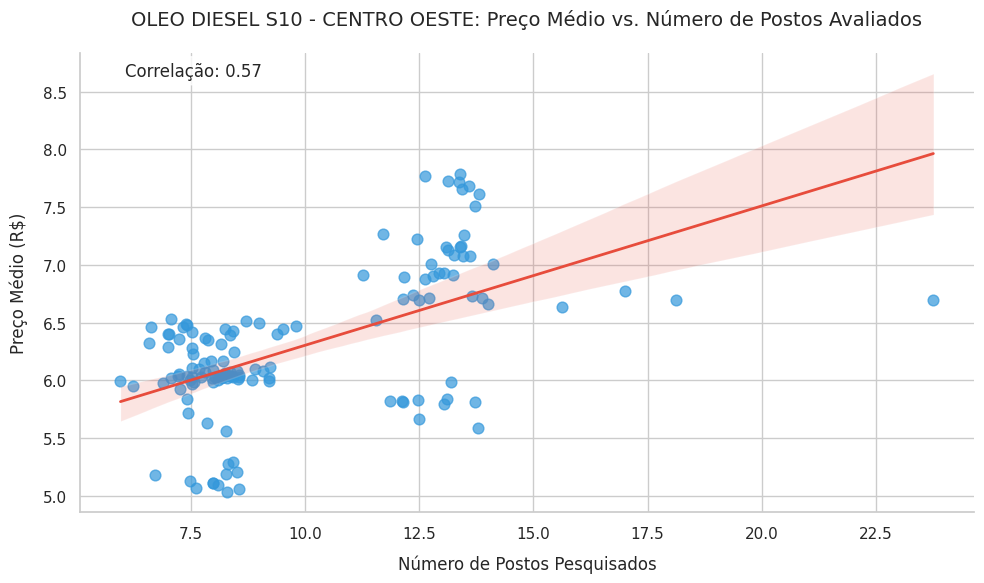

In [49]:
# Exemplo: Correlação Positiva
plot_scatter_correlacao(df_agrupado, "CENTRO OESTE", "OLEO DIESEL S10")

In [50]:
# Top Correlações Negativas
extrair_top_correlacoes(df_correlacoes, "negativas")

REGIÃO             PRODUTO  CORRELAÇÃO
16         NORTE      GASOLINA COMUM   -0.392262
15         NORTE  GASOLINA ADITIVADA   -0.392246
10      NORDESTE                 GLP   -0.359122
3   CENTRO OESTE                 GLP   -0.354235
29           SUL  GASOLINA ADITIVADA   -0.273922

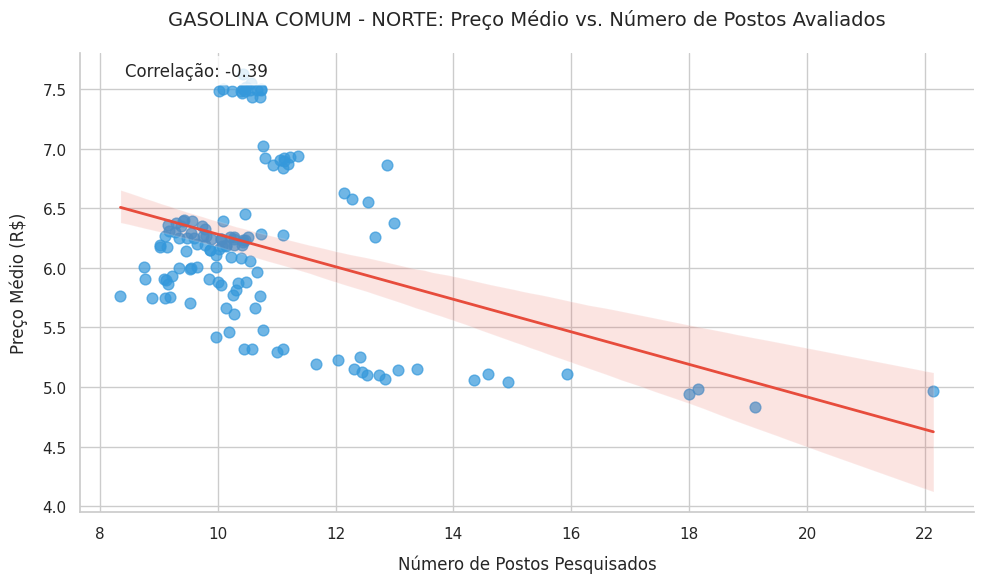

In [51]:
# Exemplo: Correlação negativa
plot_scatter_correlacao(df_agrupado, "NORTE", "GASOLINA COMUM")

In [52]:
# Top Correlações Neutras
extrair_top_correlacoes(df_correlacoes, "neutras")

REGIÃO           PRODUTO  CORRELAÇÃO
2   CENTRO OESTE    GASOLINA COMUM    0.014524
21       SUDESTE  ETANOL HIDRATADO   -0.021014
9       NORDESTE    GASOLINA COMUM    0.034888
28           SUL  ETANOL HIDRATADO   -0.041472
24       SUDESTE               GLP   -0.073427

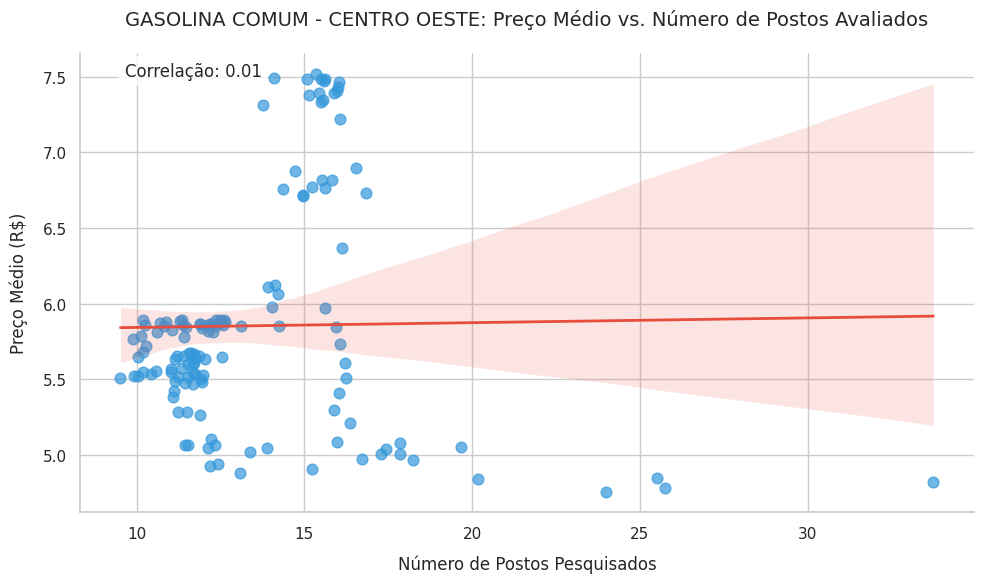

In [53]:
# Exemplo: Correlação Neutra
plot_scatter_correlacao(df_agrupado, "CENTRO OESTE", "GASOLINA COMUM")

### A influência da quantidade de postos avaliados no preço dos combustíveis

A análise dos dados revela que o impacto da quantidade de postos avaliados no cálculo do preço médio dos combustíveis varia conforme o tipo de combustível e a região do país. Não existe um padrão único, mas algumas tendências se destacam.

1. **Centro-Oeste e Óleo Diesel S10 (correlação positiva de 0,57)**:
  
  Aqui, há uma tendência clara de aumento nos preços quando mais postos são avaliados. Isso sugere que, nessa região, uma maior abrangência da pesquisa está associada a preços médios mais elevados para esse combustível.

2. **Norte e Gasolina Comum (correlação negativa de -0,39)**:

  Nesse caso, quanto mais postos são incluídos na pesquisa, menores são os preços médios registrados. Isso indica que a expansão da avaliação pode capturar postos com valores mais baixos, reduzindo a média geral.

3. **Centro-Oeste e Gasolina Comum (correlação neutra de 0,01)**:

  Já nesta combinação, a quantidade de postos pesquisados praticamente não influencia o preço médio. Indicando que o número de postos pesquisados não teve uma relação significativa com o preço médio.

**Conclusão:**

A influência da quantidade de postos nos preços depende do contexto. Enquanto alguns combustíveis e regiões apresentam relações fortes (positivas ou negativas), outros não demonstram nenhuma ligação significativa. Isso reforça a importância de analisar os dados considerando as particularidades de cada produto e localidade, evitando generalizações.

## Previsão de Tendências de Mercado

Antecipar tendências de mercado é uma das aplicações mais valiosas da análise de dados. No setor de combustíveis, prever como os preços vão se comportar ao longo do tempo ajuda consumidores, distribuidores e autoridades políticas a tomar decisões mais estratégicas.

Neste estudo, usamos dados históricos de preços de revenda de combustíveis no Brasil para estimar os valores esperados entre setembro e dezembro de 2024. Através da combinação de técnicas de séries temporais e modelos de machine learning para projetar essas tendências com base nos padrões dos últimos anos.

Optamos pelo modelo Prophet, desenvolvido pelo Facebook (Meta), por sua capacidade de identificar tendências e variações sazonais mesmo em um mercado sujeito a oscilações. O modelo foi treinado com dados confiáveis, organizados por mês e por tipo de combustível, garantindo robustez e clareza nas previsões.

### O que é Machine Learning?
Machine Learning, ou aprendizado de máquina, é um campo da inteligência artificial que permite que algoritmos analisem grandes volumes de dados, identifiquem padrões e façam previsões com base nesses aprendizados. Em vez de seguir instruções fixas, os modelos de machine learning ajustam-se automaticamente conforme os dados de entrada, o que os torna especialmente úteis em tarefas como a previsão de preços ao longo do tempo.

No contexto deste projeto, usamos o histórico dos preços dos combustíveis para "ensinar" o modelo a reconhecer como os valores variam ao longo dos meses e, assim, antecipar os preços futuros.

### Por que usamos o Prophet?
Inicialmente, testamos o modelo SARIMA, uma técnica clássica para previsão de séries temporais. No entanto, observamos que seu desempenho foi limitado, especialmente em contextos com oscilações não lineares ou comportamento mais instável.

Optamos então por utilizar o Prophet, um modelo criado pelo Facebook (Meta), especificamente voltado para a previsão de séries temporais com tendência e sazonalidade — características muito presentes nos preços dos combustíveis.

A escolha pelo Prophet se justificou por três principais motivos:

- Robustez na identificação de padrões sazonais e tendências de longo prazo

- Facilidade de uso e menor necessidade de ajustes manuais

- Melhor desempenho nos testes comparativos realizados neste projeto

Com essas vantagens, o Prophet se mostrou a ferramenta ideal para estimar com boa precisão os preços dos combustíveis no curto prazo.

### Treinamento e Avaliação do Modelo de Previsão

#### Critérios para Escolha do Combustível e da Região

Para avaliar o modelo de previsão com mais controle e confiabilidade, escolhemos o GLP (Gás Liquefeito de Petróleo) como combustível de referência e focamos a análise na Região Sul do Brasil.

A escolha do GLP foi baseada em dados estatísticos: entre todos os combustíveis analisados, ele apresentou o menor coeficiente de variação (CV), o que indica um histórico de preços mais estável. Essa estabilidade ajuda a reduzir o impacto de oscilações abruptas e facilita a análise do desempenho do modelo.

Da mesma forma, a Região Sul foi selecionada por apresentar a menor volatilidade regional nos preços de revenda. Isso reforça a estabilidade do cenário analisado e permite que a performance do modelo seja avaliada com maior precisão, isolando os efeitos de ruídos externos.

#### Preparação dos Dados para o Prophet

O primeiro passo foi preparar os dados no formato exigido pelo modelo Prophet. Para isso, criamos uma função chamada preparar_dados, que filtra o DataFrame original com base no tipo de combustível e na região selecionada — neste caso, **GLP na Região Sul**.

Depois do filtro, os dados são agrupados por mês, com base na data de coleta (campo `DATA FINAL`). Para cada mês, é calculado o **preço médio de revenda**, formando assim uma série temporal mensal.

Por fim, as colunas são renomeadas conforme o padrão exigido pelo Prophet:

- `ds` para as datas (início de cada mês)

- `y`  para os valores numéricos que o modelo irá prever (preço médio)

In [54]:
def preparar_dados(df, produto, regiao):
    """
    Prepara os dados de um combustível específico em uma determinada região
    para uso no modelo Prophet.

    Parâmetros:
    - df (pd.DataFrame): DataFrame original
    - produto (str): nome do combustível
    - regiao (str): nome da região

    Retorna:
    - DataFrame com colunas ['ds', 'y']:
        - 'ds': datas no início de cada mês
        - 'y' : preço médio de revenda mensal
    """

    # Filtra os dados
    df_filtrado = df[
        (df["PRODUTO"] == produto) & (df["REGIÃO"] == regiao)
    ].copy()

    # Cria uma coluna com a data padronizada para o primeiro dia de cada mês
    df_filtrado["ANO_MES"] = (
        df_filtrado["DATA FINAL"].dt.to_period("M").dt.to_timestamp()
    )

    # Agrupa os dados por mês e calcula a média do preço de revenda
    df_mensal = df_filtrado.groupby("ANO_MES", as_index=False)[
        "PREÇO MÉDIO REVENDA"
    ].mean()

    # Renomeia as colunas no formato exigido pelo Prophet
    df_mensal.rename(
        columns={"ANO_MES": "ds", "PREÇO MÉDIO REVENDA": "y"}, inplace=True
    )

    return df_mensal

In [55]:
produto = "GLP"
df_prophet = preparar_dados(df_combustivel, produto, "SUL")
df_prophet.tail()

ds           y
27 2024-04-01  106.341195
28 2024-05-01  106.436486
29 2024-06-01  106.078333
30 2024-07-01  107.218143
31 2024-08-01  108.826471

#### Treinamento do Modelo

Com os dados mensais do GLP preparados, o próximo passo foi treinar o modelo.

Para isso, filtramos os dados até março de 2024. Isso garante que o modelo seja treinado apenas com informações passadas, simulando um cenário real de previsão — onde só se pode trabalhar com dados já disponíveis no momento da análise.

Com o conjunto de treinamento definido (`df_treino`), instanciamos o Prophet, modelo projetado para detectar tendências e padrões sazonais em séries temporais. Em seguida, ajustamos (`fit`) o modelo com os dados, permitindo que ele aprenda o comportamento histórico dos preços.

A partir disso, o Prophet gera uma estrutura estatística capaz de projetar os preços futuros do combustível com base nos padrões identificados.

In [56]:
# Filtrar os dados até março de 2024
df_treino = df_prophet[df_prophet["ds"] <= "2024-03-01"]

# Instanciar e treinar o modelo Prophet
modelo_prophet = Prophet()
modelo_prophet.fit(df_treino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 20.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvruzizis/_jfn6yzz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvruzizis/iafygpx_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65443', 'data', 'file=/tmp/tmpvruzizis/_jfn6yzz.json', 'init=/tmp/tmpvruzizis/iafygpx_.json', 'output', 'file=/tmp/tmpvruzizis/prophet_modellviqa6gz/prophet_model-20250505125827.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:58:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:

#### Geração das Previsões

Com o modelo Prophet já treinado, o próximo passo foi gerar previsões para os meses que ficaram de fora do treinamento. Para isso, usamos a função `make_future_dataframe`, que cria uma sequência de datas futuras — neste caso, os quatro meses seguintes ao fim do conjunto de treino, cobrindo o período de abril a julho de 2024.

Depois, aplicamos o modelo a esse novo conjunto de datas para obter as previsões. O resultado é um DataFrame com várias colunas, entre elas:

- `yhat`: valor previsto para o preço médio

- `yhat_lower` e `yhat_upper`: limites inferior e superior do intervalo de confiança da previsão

Por fim, filtramos apenas os meses de interesse (abril a julho de 2024) para comparar as previsões com os valores reais registrados nesse período.

In [57]:
# Gerar datas futuras para previsão (4 meses à frente: abril a julho/2024)
df_futuro = modelo_prophet.make_future_dataframe(periods=4, freq="MS")

# Gerar previsões usando o modelo treinado
df_previsoes = modelo_prophet.predict(df_futuro)

# Filtrar apenas as previsões entre abril e julho de 2024
df_previsoes_avaliacao = df_previsoes[
    (df_previsoes["ds"] >= "2024-04-01") & (df_previsoes["ds"] <= "2024-07-01")
][["ds", "yhat", "yhat_lower", "yhat_upper"]]

# Visualizar as previsões filtradas
df_previsoes_avaliacao

ds        yhat  yhat_lower  yhat_upper
27 2024-04-01  116.379493  116.071885  116.702050
28 2024-05-01  103.015624  102.051018  104.014279
29 2024-06-01  100.687721   98.833954  102.550039
30 2024-07-01  101.531961   98.611548  104.723084

#### Comparação entre Real e Previsto

Com as previsões geradas, o passo seguinte foi comparar esses resultados com os valores reais, para avaliar a precisão do modelo.

Filtramos os dados originais para obter apenas os preços reais observados entre abril e julho de 2024 — o mesmo período das previsões. Em seguida, cruzamos essas informações com os valores previstos.

O resultado dessa junção é um novo DataFrame, chamado `df_comparacao`, que apresenta lado a lado:

- O preço médio real de revenda (`y`)

- O valor previsto pelo modelo Prophet (`yhat`)



In [58]:
# Filtrar os dados reais de abril a julho de 2024
df_real = df_prophet[
    (df_prophet["ds"] >= "2024-04-01") & (df_prophet["ds"] <= "2024-07-01")
][["ds", "y"]]

# Unir os dados reais com os valores previstos pelo modelo
df_comparacao = pd.merge(
    df_real, df_previsoes_avaliacao[["ds", "yhat"]], on="ds", how="inner"
)

# Visualizar comparações
df_comparacao

ds           y        yhat
0 2024-04-01  106.341195  116.379493
1 2024-05-01  106.436486  103.015624
2 2024-06-01  106.078333  100.687721
3 2024-07-01  107.218143  101.531961

#### Visualização da Comparação

O gráfico abaixo mostra a comparação entre os valores reais e os previstos pelo modelo.

A linha azul representa os preços médios reais observados, enquanto a linha vermelha tracejada indica os valores estimados pelo Prophet.

É possível notar que o modelo acompanha a tendência geral dos dados, mas subestimou os preços reais em praticamente todos os meses analisados.

Essa visualização reforça a necessidade de uma avaliação quantitativa da qualidade das previsões — o que será feito a seguir com o uso de métricas específicas.

In [59]:
def plot_comparacao_real_previsto(df, produto, regiao, periodo):
    """
    Gera um gráfico de comparação entre valores reais e previstos.

    Parâmetros:
    - df (pd.DataFrame): DataFrame contendo as colunas: 'ds' (meses), 'y' (valores reais) e 'yhat' (valores previstos)
    - produto (str): Nome do produto para título do gráfico
    - regiao (str): Região para título do gráfico
    - periodo (str): Período de análise para o título do gráfico
    """

    # Configurar o gráfico
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Plotagem dos dados reais
    sns.lineplot(
        data=df, x="ds", y="y", color="#3498DB", label="Real", marker="o"
    )

    # Plotagem dos dados previstos
    sns.lineplot(
        data=df,
        x="ds",
        y="yhat",
        color="#E74C3C",
        label="Previsto",
        marker="X",
        linestyle="--",
    )

    # Customização do gráfico
    plt.title(
        f"Preço do {produto} - Região: {regiao}\nComparativo: Valores Reais vs Previsões ({periodo})",
        pad=20,
        fontsize=14,
    )
    plt.xlabel("Data", labelpad=10)
    plt.ylabel("Preço Médio de Revenda (R$)", labelpad=10)

    # Melhorias visuais
    plt.grid(True)
    sns.despine(top=True, right=True)
    plt.legend(title="Dados", bbox_to_anchor=(1, 1), fontsize=10)

    # Ajustes finais
    plt.tight_layout()

    plt.show()

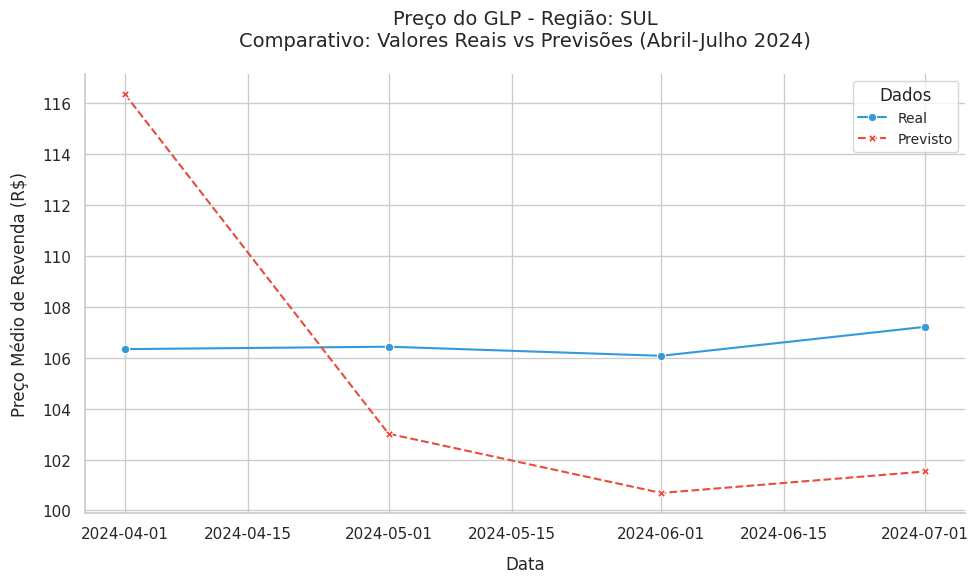

In [60]:
plot_comparacao_real_previsto(df_comparacao, "GLP", "SUL", "Abril-Julho 2024")

#### Avaliação do Modelo

Para medir a qualidade das previsões feitas pelo Prophet, utilizamos três métricas clássicas em séries temporais: **MAE**, **RMSE** e **MAPE**. Cada uma delas mede, de maneira diferente, o quanto o modelo errou em relação aos valores reais.

- **MAE (Erro Absoluto Médio)**:
  
  Indica, em média, quanto o modelo errou em reais, sem considerar a direção do erro.

  > Resultado: R\\$ 6,13 — ou seja, o modelo errou cerca de R\\$ 6,13 por mês, em média.

- **RMSE (Raiz do Erro Quadrático Médio)**:

  Semelhante ao MAE, mas penaliza mais fortemente erros maiores.
  
  > Resultado: R\\$ 6,59 — sugerindo que, quando consideradas variações mais intensas, o erro médio aumenta um pouco.

- **MAPE (Erro Percentual Absoluto Médio)**:

  Mostra o erro médio em termos percentuais em relação ao valor real, o que facilita a interpretação proporcional.
  
  > Resultado: 5,76% — o modelo apresentou, em média, um desvio de 5,8% em relação aos valores reais.

**Conclusão**

Com um MAPE de 5,76%, o desempenho do modelo pode ser classificado como bom, segundo padrões internacionais. Isso indica que o Prophet é uma ferramenta confiável para previsões de curto prazo, especialmente em mercados com menor volatilidade, como o GLP na Região Sul.

Além disso, os valores de MAE e RMSE reforçam que os erros foram moderados e consistentes ao longo dos quatro meses analisados.

In [61]:
mae = mean_absolute_error(df_comparacao["y"], df_comparacao["yhat"])
rmse = np.sqrt(mean_squared_error(df_comparacao["y"], df_comparacao["yhat"]))
mape = (
    abs(df_comparacao["y"] - df_comparacao["yhat"]) / df_comparacao["y"]
).mean() * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 6.13
RMSE: 6.59
MAPE: 5.76%


### Previsões

#### Contextualização da Previsão
Após a etapa de treinamento e avaliação do modelo de previsão, optamos por utilizar o **GLP (Gás Liquefeito de Petróleo)** como combustível representativo nesta análise. Essa decisão foi motivada por dois fatores principais:

- **Desempenho consistente no modelo**: o GLP foi um dos combustíveis que apresentou melhor aderência ao modelo Prophet, com boa capacidade preditiva e margem de erro aceitável.

- **Baixa volatilidade**: estatisticamente,  entre os combustíveis analisados, o GLP foi o que teve o comportamento mais estável, facilitando a validação do modelo em um cenário controlado.

Embora o ideal fosse estender a previsão para todos os combustíveis e regiões, essa abordagem exigiria tempo de processamento considerável e não se mostrava viável dentro das limitações do projeto.

Vale destacar que toda a lógica aplicada ao GLP foi construída de forma genérica e reutilizável. Ou seja, a mesma metodologia pode ser facilmente aplicada a outros combustíveis, bastando alterar o parâmetro do produto.

Essa escolha, portanto, não limita a abordagem, mas oferece uma base sólida e confiável que pode ser replicada para ampliar as previsões no setor de combustíveis.

#### `[código-fonte]`

**Funções**

In [62]:
def preparar_dados_regiao(df, produto, regiao):
    """
    Prepara os dados de um combustível específico em uma determinada região
    para uso no modelo Prophet.

    Parâmetros:
    - df (pd.DataFrame): DataFrame original
    - produto (str): nome do combustível
    - regiao (str): nome da região

    Retorna:
    - DataFrame com colunas ['ds', 'y', 'REGIÃO']:
        - 'ds': datas no início de cada mês
        - 'y' : preço médio de revenda mensal
        - 'REGIÃO': nome da região
    """
    df_filtrado = df[
        (df["PRODUTO"] == produto) & (df["REGIÃO"] == regiao)
    ].copy()
    df_filtrado["ANO_MES"] = (
        df_filtrado["DATA FINAL"].dt.to_period("M").dt.to_timestamp()
    )

    df_mensal = df_filtrado.groupby("ANO_MES", as_index=False)[
        "PREÇO MÉDIO REVENDA"
    ].mean()
    df_mensal.rename(
        columns={"ANO_MES": "ds", "PREÇO MÉDIO REVENDA": "y"}, inplace=True
    )

    # Adiciona a coluna da região
    df_mensal["REGIÃO"] = regiao

    return df_mensal

In [63]:
def treinar_modelo(df_prophet):
    """
    Treina o modelo Prophet com dados até agosto de 2024.
    """
    df_treino = df_prophet[df_prophet["ds"] <= "2024-08-01"]

    modelo = Prophet()

    modelo.fit(df_treino)

    return modelo

In [64]:
def gerar_previsao(modelo, meses=4):
    """
    Gera a previsão para os próximos meses a partir do final da série histórica.
    """
    df_futuro = modelo.make_future_dataframe(periods=meses, freq="MS")

    previsoes = modelo.predict(df_futuro)

    df_previsao_final = previsoes[
        (previsoes["ds"] >= "2024-09-01") & (previsoes["ds"] <= "2024-12-01")
    ][["ds", "yhat", "yhat_lower", "yhat_upper"]]

    return df_previsao_final

In [65]:
def executar_fluxo_previsao(df, produto, regiao):
    """
    Executa o fluxo completo de previsão: preparação dos dados,
    treinamento do modelo e geração da previsão final.
    """
    df_preparado = preparar_dados_regiao(df, produto, regiao)

    modelo = treinar_modelo(df_preparado)

    previsoes = gerar_previsao(modelo, 4)

    previsoes["PRODUTO"] = produto

    previsoes["REGIÃO"] = regiao

    return previsoes

In [66]:
def classificar_quadrimestre(data):
    mes = data.month
    if mes in [1, 2, 3, 4]:
        return "Jan–Abr"
    elif mes in [5, 6, 7, 8]:
        return "Mai–Ago"
    elif mes in [9, 10, 11, 12]:
        return "Set–Dez"
    return "Outro"

In [67]:
def calcular_media_quadrimestre(df):
    """
    Calcula a média do preço por quadrimestre, região e tipo.

    Parâmetros:
    - df (DataFrame): deve conter colunas 'ds', 'y', 'REGIÃO' e 'TIPO'

    Retorna:
    - DataFrame com colunas: ['REGIÃO', 'QUADRIMESTRE', 'TIPO', 'y', 'INDICE']
    """
    df = df.copy()

    df["QUADRIMESTRE"] = df["ds"].apply(classificar_quadrimestre)

    df["INDICE"] = df["QUADRIMESTRE"].map(
        {"Jan–Abr": 1, "Mai–Ago": 2, "Set–Dez": 3}
    )

    df["ANO"] = df["ds"].dt.year

    medias = df.groupby(
        ["REGIÃO", "QUADRIMESTRE", "TIPO", "INDICE"], as_index=False
    )["y"].mean()

    return medias

In [68]:
def plot_variacao_precos_combustivel_regiao(df, titulo):
    """
    Plota gráfico da evolução mensal dos preços médios de revenda por região,
    mostrando dados históricos e previstos.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo as colunas ['ds', 'y', 'REGIÃO', 'TIPO'].
    titulo (str): Título personalizado do gráfico.
    """

    # Definir paleta de cores personalizada
    paleta_regioes = {
        "NORTE": "#27AE60",
        "NORDESTE": "#FFC300",
        "CENTRO OESTE": "#E67E22",
        "SUDESTE": "#2980B9",
        "SUL": "#8E44AD",
    }

    # Criar a figura
    fig, ax = plt.subplots(figsize=(18, 6))

    sns.lineplot(
        data=df,
        x="ds",
        y="y",
        style="TIPO",
        hue="REGIÃO",
        palette=paleta_regioes,
        markers=True,
        ax=ax,
    )

    # Linha vertical para marcar o início das previsões
    ax.axvline(
        pd.to_datetime("2024-09-01"), color="red", linestyle=":", alpha=0.7
    )

    # Configuroes
    ax.set_title(titulo, fontsize=16, pad=20)
    ax.set_xlabel("Data")
    ax.set_ylabel("Preço Médio de Revenda (R$)")
    ax.grid(True)
    plt.legend(title="Região", bbox_to_anchor=(1.02, 1))

    # Ajustes finais
    sns.despine(ax=ax, top=True, right=True)
    plt.tight_layout()
    plt.show()

In [69]:
def plot_media_precos_quadrimestre_regiao(df, titulo):
    """
    Gera gráfico de barras agrupadas com média de preços por região e quadrimestre.

    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados já agrupados.
    titulo (str): Título personalizado do gráfico.
    """

    df = df.copy()

    df = df.sort_values(by="INDICE")

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=df, x="REGIÃO", y="y", hue="QUADRIMESTRE", edgecolor="lightgray"
    )

    # Adicionar hachuras nas barras de previsão
    for bar, (_, row) in zip(ax.patches, df.iterrows()):
        if row["TIPO"] == "Previsão":
            bar.set_hatch("//")
            bar.set_facecolor("white")

    # Configurações
    ax.set_title(titulo, fontsize=16, pad=20)
    ax.set_xlabel("Região")
    ax.set_ylabel("Preço Médio de Revenda (R$)")
    ax.grid(True)
    sns.despine(top=True, right=True)
    ax.legend(title="Quadrimestre")

    # Ajustes finais
    plt.tight_layout()
    plt.show()

**Tratamento de Dados**

In [70]:
produto = "GLP"

# NORTE
df_norte = preparar_dados_regiao(df_combustivel, produto, "NORTE")

# NORDESTE
df_nordeste = preparar_dados_regiao(df_combustivel, produto, "NORDESTE")

# CENTRO-OESTE
df_centro = preparar_dados_regiao(df_combustivel, produto, "CENTRO OESTE")

# SUL
df_sul = preparar_dados_regiao(df_combustivel, produto, "SUL")

# SUDESTE
df_sudeste = preparar_dados_regiao(df_combustivel, produto, "SUDESTE")

# CONSOLIDADO
df_historico_consolidado = pd.concat(
    [df_norte, df_nordeste, df_centro, df_sul, df_sudeste], ignore_index=True
)


In [71]:
log.getLogger("prophet").setLevel(log.WARNING)
log.getLogger("cmdstanpy").setLevel(log.WARNING)

# NORTE
df_norte = executar_fluxo_previsao(df_combustivel, produto, "NORTE")

# NORDESTE
df_nordeste = executar_fluxo_previsao(df_combustivel, produto, "NORDESTE")

# CENTRO-OESTE
df_centro = executar_fluxo_previsao(df_combustivel, produto, "CENTRO OESTE")

# SUL
df_sul = executar_fluxo_previsao(df_combustivel, produto, "SUL")

# SUDESTE
df_sudeste = executar_fluxo_previsao(df_combustivel, produto, "SUDESTE")

# CONSOLIDADO
df_previsoes_consolidado = pd.concat(
    [df_norte, df_nordeste, df_centro, df_sul, df_sudeste], ignore_index=True
)


In [72]:
df_historico = df_historico_consolidado.copy()
df_previsoes = df_previsoes_consolidado.copy()

# Padronizar colunas e adicionar marcador de origem
df_historico = df_historico[["ds", "y", "REGIÃO"]]
df_historico["TIPO"] = "Histórico"

df_previsoes = df_previsoes[["ds", "yhat", "REGIÃO"]].rename(
    columns={"yhat": "y"}
)
df_previsoes["TIPO"] = "Previsão"

# Combinar os dois dataframes
df_comparativo = pd.concat([df_historico, df_previsoes], ignore_index=True)

# Dataframe com Histório + Previsões
df_comparativo.tail()

ds           y   REGIÃO      TIPO
175 2024-12-01  105.946034      SUL  Previsão
176 2024-09-01   99.446807  SUDESTE  Previsão
177 2024-10-01   94.166379  SUDESTE  Previsão
178 2024-11-01   95.925046  SUDESTE  Previsão
179 2024-12-01   99.116811  SUDESTE  Previsão

#### Análise das Previsões do Preço do GLP por Região

Com base nos dados históricos de 2024 e nas previsões geradas pelo modelo Prophet, analisamos a evolução dos preços do GLP nas cinco regiões do Brasil ao longo dos quadrimestres do ano.

As análises a seguir têm como base dois gráficos principais:

- **Série temporal por região**: mostra a trajetória dos preços ao longo do ano, incluindo os valores reais e as projeções.

- **Gráfico de barras agrupadas**: apresenta a média dos preços em cada quadrimestre, facilitando a comparação entre as regiões.


In [73]:
df_comparativo_2024 = df_comparativo[df_comparativo["ds"] >= "2024-01-01"]
df_comparativo_2024.tail(4)

ds          y   REGIÃO      TIPO
176 2024-09-01  99.446807  SUDESTE  Previsão
177 2024-10-01  94.166379  SUDESTE  Previsão
178 2024-11-01  95.925046  SUDESTE  Previsão
179 2024-12-01  99.116811  SUDESTE  Previsão

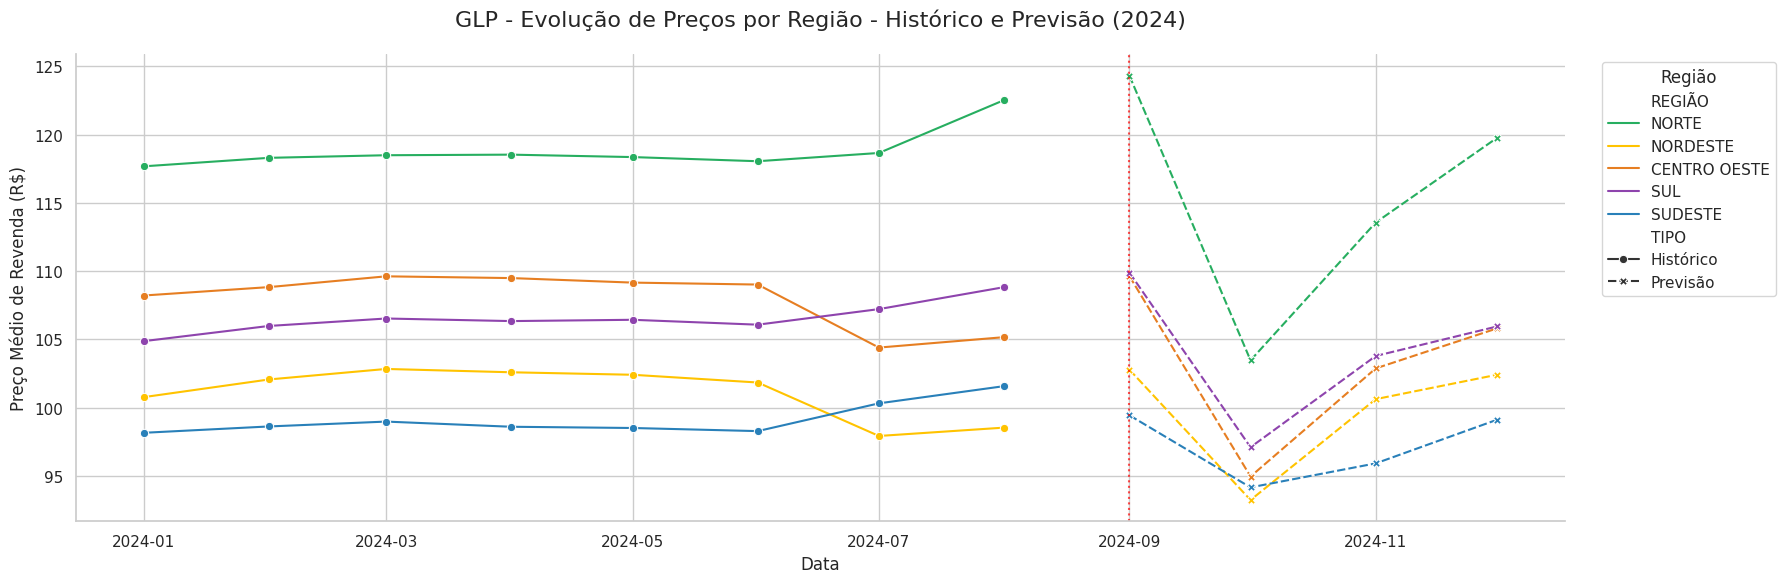

In [74]:
plot_variacao_precos_combustivel_regiao(
    df_comparativo_2024,
    "GLP - Evolução de Preços por Região - Histórico e Previsão (2024)",
)

In [75]:
df_quadrimestre_2024 = calcular_media_quadrimestre(df_comparativo_2024)
df_quadrimestre_2024.tail(3)

REGIÃO QUADRIMESTRE       TIPO  INDICE           y
12    SUL      Jan–Abr  Histórico       1  105.932570
13    SUL      Mai–Ago  Histórico       2  107.139858
14    SUL      Set–Dez   Previsão       3  104.184817

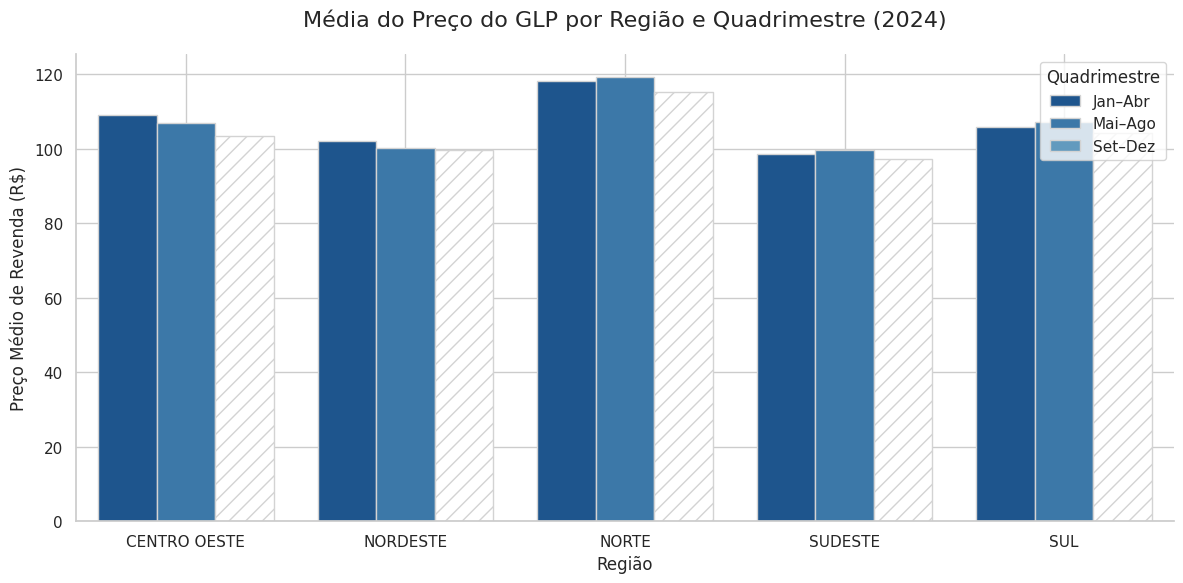

In [76]:
plot_media_precos_quadrimestre_regiao(
    df_quadrimestre_2024,
    "Média do Preço do GLP por Região e Quadrimestre (2024)",
)

##### **Comportamento Geral dos Preços**
Nos dois primeiros quadrimestres de 2024, o preço do GLP mostrou pouca variação nas cinco regiões do país, mantendo um padrão de relativa estabilidade.

A Região Norte registrou os preços médios mais altos ao longo do período, enquanto Sudeste e Nordeste concentraram os menores valores.

##### **Tendência das Previsões (Set–Dez/2024)**
As previsões para o último quadrimestre do ano indicam uma leve queda no preço médio do GLP em todas as regiões.

Essa redução não é brusca, mas segue o ritmo de desaceleração já observado entre os quadrimestres anteriores — o que mostra coerência entre as projeções e os dados históricos.

Mesmo com a queda, a hierarquia regional de preços se mantém, o que também contribui para a plausibilidade dos resultados.

##### **Comparação por Quadrimestre**
O gráfico de barras mostra que em todas as regiões, a média de preços prevista para o quadrimestre de setembro a dezembro é menor do que nos períodos anteriores de 2024.

Essa redução varia entre 1% e 3% — uma queda modesta, mas que pode ser sentida no mercado.

Além disso, as diferenças entre as regiões continuam estáveis, o que sugere que fatores locais como logística, demanda e distribuição seguem influenciando os preços.

##### **Conclusão**
As previsões para o GLP no último quadrimestre de 2024 estão alinhadas com o histórico recente. O modelo não apenas acompanhou o comportamento da série, mas também preservou as diferenças regionais e apresentou resultados coerentes com a tendência observada ao longo do ano.

Essas projeções ajudam a antecipar o cenário de preços no fim de 2024, oferecendo informações valiosas para consumidores, distribuidores e formuladores de políticas públicas.

## Conclusão Geral do Projeto

Este projeto teve como objetivo compreender, mensurar e antecipar os comportamentos dos preços dos combustíveis no Brasil, utilizando dados públicos disponibilizados pela ANP desde o início de 2022. Combinando análise exploratória, estatística descritiva e modelagem preditiva, foi possível não só descrever o cenário atual, mas também gerar insights relevantes e projeções bem fundamentadas.

A primeira etapa consistiu em uma análise completa dos dados, incluindo a limpeza, o tratamento e a padronização das variáveis. Em seguida, a análise estatística e temporal evidenciou diferenças significativas entre os tipos de combustíveis e entre as regiões do país, ressaltando padrões de consumo, estabilidade e variação de preços.

Na comparação regional, identificamos as regiões que consistentemente apresentam os maiores e menores preços médios para cada tipo de combustível. Além disso, aplicamos o coeficiente de variação como métrica padronizada para medir a volatilidade regional. Constatamos, por exemplo, que o GLP se mostra como o combustível mais estável, enquanto a região Norte frequentemente apresenta os preços mais elevados.

Outro ponto importante foi investigar a relação entre a quantidade de postos analisados e os preços registrados. Os resultados indicaram que, apesar de haver correlação em determinados contextos, essa relação não é suficientemente forte para ser generalizada — sugerindo que outros fatores exercem maior influência sobre os preços.

Por fim, com o uso de modelos de séries temporais baseados em machine learning (Prophet), realizamos previsões para os preços do GLP no último quadrimestre de 2024. O GLP foi escolhido por ser o combustível com menor volatilidade e melhor desempenho nos testes iniciais. As previsões apontaram uma leve tendência de queda nos preços, mantendo, porém, a hierarquia regional observada ao longo do período analisado. Vale destacar que a metodologia aplicada é modular e pode ser adaptada para outros combustíveis ou regiões, o que reforça a aplicabilidade prática do projeto.

## Agradecimentos

Em 2024, tive a oportunidade de participar do Bootcamp Data Analytics promovido pela WoMakersCode, uma ONG que oferece formação gratuita e de qualidade para mulheres na área de tecnologia. Fui contemplada com uma bolsa e sou profundamente grata por isso. Essa experiência foi transformadora: me proporcionou uma base sólida em análise de dados, expandiu minha visão sobre carreira e fortaleceu minha confiança para seguir na área.

O projeto apresentado foi originalmente desenvolvido em grupo como parte do trabalho de conclusão do bootcamp, em colaboração com minha squad, Sarah Jackson. A experiência de trabalhar em equipe foi enriquecedora. No entanto, senti o desejo de refazer o projeto individualmente, adotando uma abordagem mais pessoal, flexível e alinhada ao meu estilo — e esse foi o resultado.

Gostaria de expressar meu sincero agradecimento à equipe da WoMakersCode, a todas as colegas da minha squad Sarah Jackson, e ao meu marido, que me apoiou e esteve ao meu lado durante todos os meses de estudo e dedicação. Sem esse suporte, essa jornada teria sido muito mais desafiadora.